# Covid-19 Data Analytics

## The Covid-19 case Data

This data is the Covid-19 cases in each country and the content. The data was collected by web scraping from https://www.worldometers.info/coronavirus/#countries. In this dataset, there are provide the interesting variable, namely country, total cases, new cases, total deaths, new deaths, total tests, total recovered, new recovered, Active/Serious cases, population and continents. From this data set, it can analyze how the continent and population affect the Covid-19 cases. Which country or continent has the highest/lowest case. I can analyze the relationship between cases and the active/serious case. The other analysis will follow the below step by step. In addition, this data is a dynamic website and it collects the data in real-time every day.

### Step 1 : Data Collection

Data collection the COVID-19 cases from https://www.worldometers.info/coronavirus/#countries  by web scraping  
  
**1.1 Install the library for use in this project**

In [182]:
!pip install beautifulsoup4
!pip install requests
!pip install pandas --upgrade --quiet
!pip install matplotlib

**1.2 Import the package which use in the part**

In [183]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

**1.3 Send request sever and open the website**

In [184]:
url = 'https://www.worldometers.info/coronavirus/#countries'
r = Request(url, headers={'User-Agent': "Mozilla/5.0"})
webpage = urlopen(r)
page_open = soup(webpage, "html.parser")

**1.4 Find the table which contain the data from previous day in web page**
  
Because this website collects the data in real-time so, today data haven't finished collected. This is better to use the data yesterday due to finishing collected.

In [185]:
#find the table which contain the data from previous day in web page
table = page_open.findAll("table",{"id" : "main_table_countries_yesterday"})
table

[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_yesterday" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New 

In [186]:
store_data = table[0].findAll("tr",{"style":""})#find the list of country
store_data[0] # return the list of data

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [187]:
store_data[0] #return the head of colum

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

In [188]:
store_data[0] #return the row1 in world 

<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>

**1.5 Built the data set**

In [189]:
del store_data[0] #delet the heading of colum in first row
records = [] #create the list for store all of data

for country in store_data: #loop for append data in records list
    all_data = []
    country_records = country.findAll("td") 
    
    for i in range(1,len(country_records)): #loop for the data in each row
        each_data = country_records[i].text #return the each index of row
        
        if True: # check the data 
            if i != 1 and i != len(country_records)-1: #Inclusive the country name and not out of the index row
                each_data = each_data.replace(",","") #replace(delete) the comma 
            
                if each_data.find('+') != -1: #check if the in front or number have +
                    each_data = each_data.replace("+","")#replace , to be the emphty string
                    each_data = float(each_data) #change data to be the float type
                elif each_data.find('-') != -1: #check if the in front or number have -
                    each_data = each_data.replace("-","")
                    each_data = float(each_data)*-1 #change to the minus number
        
            if each_data =="N/A": #replace N/A to be 0
                each_data = 0
            
            all_data.append(each_data)#append in the all_data list
    
    records.append(all_data)
                

In [190]:
records #test the result

[['World',
  '305922520',
  2239662.0,
  '5502418',
  5218.0,
  '258955205',
  611138.0,
  '41464897',
  '94107',
  '39247',
  '705.9',
  '',
  '',
  '',
  'All',
  '\n',
  '',
  '',
  '',
  '',
  ''],
 ['China',
  '103454',
  159.0,
  '4636 ',
  '',
  '95451',
  151.0,
  '3367',
  '27',
  '72',
  '3',
  '160000000',
  '111163',
  '1439323776 ',
  'Asia',
  '13913',
  '310467',
  '9',
  '0.1',
  '',
  '2'],
 ['USA',
  '60954028',
  468081.0,
  '859046 ',
  669.0,
  '42221173',
  48922.0,
  '17873809',
  '22445',
  '182524',
  '2572',
  '833613178',
  '2496217',
  '333950663 ',
  'North America',
  '5',
  '389',
  '0',
  '1402',
  '2',
  '53,522'],
 ['India',
  '35528004',
  159632.0,
  '483790 ',
  327.0,
  '34453603',
  40863.0,
  '590611',
  '8944',
  '25366',
  '345',
  '688470959',
  '491552',
  '1400605955 ',
  'Asia',
  '39',
  '2895',
  '2',
  '114',
  '0.2',
  '422'],
 ['Brazil',
  '22499525',
  49303.0,
  '619981 ',
  103.0,
  '21626836',
  '',
  '252708',
  '8318',
  '104720'

**1.6 Load the Covid-19 data set into dataframe**

In [191]:
df = pd.DataFrame(records) #create the data frame
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,World,305922520,2239662.0,5502418,5218.0,258955205,611138.0,41464897,94107,39247,...,,,,All,\n,,,,,
1,China,103454,159.0,4636,,95451,151.0,3367,27,72,...,160000000,111163,1439323776,Asia,13913,310467,9,0.1,,2
2,USA,60954028,468081.0,859046,669.0,42221173,48922.0,17873809,22445,182524,...,833613178,2496217,333950663,North America,5,389,0,1402,2,"53,522"
3,India,35528004,159632.0,483790,327.0,34453603,40863.0,590611,8944,25366,...,688470959,491552,1400605955,Asia,39,2895,2,114,0.2,422
4,Brazil,22499525,49303.0,619981,103.0,21626836,,252708,8318,104720,...,63776166,296835,214854131,South America,10,347,3,229,0.5,"1,176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,,,,77,,2,,119,...,5075,7657,662772,Asia,8390,,131,,,3
213,Solomon Islands,24,,,,20,,4,,34,...,4500,6316,712427,Australia/Oceania,29684,,158,,,6
214,Palau,18,,,,12,,6,,988,...,18788,1030892,18225,Australia/Oceania,1013,,1,,,329
215,Western Sahara,10,,1,,8,,1,,16,...,,,619610,Africa,61961,619610,,,,2


**1.7 Give the name of colum**

In [192]:
df.columns= ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", 
               "New Recoverd", "Active Cases", "Serious Critical", "Tot Cases/1M pop", "Deaths/1M pop",
               "Total Tests", "Test/1M pop", "Population", "Continent", "1 Case every X ppl", "1 Death evey X ppl", 
             "1 Test every X ppl", "New Cases/1M pop", "New Deaths/1M pop", "Active Cases/1M pop"]
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,305922520,2239662.0,5502418,5218.0,258955205,611138.0,41464897,94107,39247,...,,,,All,\n,,,,,
1,China,103454,159.0,4636,,95451,151.0,3367,27,72,...,160000000,111163,1439323776,Asia,13913,310467,9,0.1,,2
2,USA,60954028,468081.0,859046,669.0,42221173,48922.0,17873809,22445,182524,...,833613178,2496217,333950663,North America,5,389,0,1402,2,"53,522"
3,India,35528004,159632.0,483790,327.0,34453603,40863.0,590611,8944,25366,...,688470959,491552,1400605955,Asia,39,2895,2,114,0.2,422
4,Brazil,22499525,49303.0,619981,103.0,21626836,,252708,8318,104720,...,63776166,296835,214854131,South America,10,347,3,229,0.5,"1,176"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,,,,77,,2,,119,...,5075,7657,662772,Asia,8390,,131,,,3
213,Solomon Islands,24,,,,20,,4,,34,...,4500,6316,712427,Australia/Oceania,29684,,158,,,6
214,Palau,18,,,,12,,6,,988,...,18788,1030892,18225,Australia/Oceania,1013,,1,,,329
215,Western Sahara,10,,1,,8,,1,,16,...,,,619610,Africa,61961,619610,,,,2


**1.8 Convert the dataframe to CSV file**

In [193]:
df.to_csv('covid19_cases.csv')

### Step 2: Perform data preparation & Cleaning 

**2.1 Explore the dataset** 
  
* Find the first five rows and the five rows from the bottom

In [194]:
df.head() #Acess first 5 rows

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,305922520,2239662.0,5502418,5218.0,258955205,611138.0,41464897,94107,39247,...,,,,All,\n,,,,,
1,China,103454,159.0,4636,,95451,151.0,3367,27,72,...,160000000,111163,1439323776,Asia,13913,310467,9,0.1,,2
2,USA,60954028,468081.0,859046,669.0,42221173,48922.0,17873809,22445,182524,...,833613178,2496217,333950663,North America,5,389,0,1402,2,"53,522"
3,India,35528004,159632.0,483790,327.0,34453603,40863.0,590611,8944,25366,...,688470959,491552,1400605955,Asia,39,2895,2,114,0.2,422
4,Brazil,22499525,49303.0,619981,103.0,21626836,,252708,8318,104720,...,63776166,296835,214854131,South America,10,347,3,229,0.5,"1,176"


In [195]:
df.tail() #Acess the 5 rows from the bottom

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
212,Macao,79,,,,77,,2,,119,...,5075,7657,662772,Asia,8390,,131,,,3
213,Solomon Islands,24,,,,20,,4,,34,...,4500,6316,712427,Australia/Oceania,29684,,158,,,6
214,Palau,18,,,,12,,6,,988,...,18788,1030892,18225,Australia/Oceania,1013,,1,,,329
215,Western Sahara,10,,1,,8,,1,,16,...,,,619610,Africa,61961,619610,,,,2
216,Total:,305922520,2239662.0,5502418,5218.0,258955205,611138.0,41464897,94107,39247.0,...,,,,All,\n,,,,,


* Explore the number of rows and columns

In [196]:
df.shape

(217, 21)

 In this dataset, there are 212 rows and 21 columns
 
 * After that, this data set can be viewed some basic information

In [197]:
df.info() #using info methode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              217 non-null    object
 1   Total Cases          217 non-null    object
 2   New Cases            217 non-null    object
 3   Total Deaths         217 non-null    object
 4   New Deaths           217 non-null    object
 5   Total Recovered      217 non-null    object
 6   New Recoverd         217 non-null    object
 7   Active Cases         217 non-null    object
 8   Serious Critical     217 non-null    object
 9   Tot Cases/1M pop     217 non-null    object
 10  Deaths/1M pop        217 non-null    object
 11  Total Tests          217 non-null    object
 12  Test/1M pop          217 non-null    object
 13  Population           217 non-null    object
 14  Continent            217 non-null    object
 15  1 Case every X ppl   217 non-null    object
 16  1 Death 

In [198]:
df.dtypes #use dtypes to view the type in every column

Country                object
Total Cases            object
New Cases              object
Total Deaths           object
New Deaths             object
Total Recovered        object
New Recoverd           object
Active Cases           object
Serious Critical       object
Tot Cases/1M pop       object
Deaths/1M pop          object
Total Tests            object
Test/1M pop            object
Population             object
Continent              object
1 Case every X ppl     object
1 Death evey X ppl     object
1 Test every X ppl     object
New Cases/1M pop       object
New Deaths/1M pop      object
Active Cases/1M pop    object
dtype: object

There are 217 index ranges. From the Non-Null Count, this column doesn't have missing values whereas the Covid-19 dataset have missing values (the empthpy space, you can see from the table) and the object columns should be float for any cloums which contain the number.

In [199]:
df.isnull() #use isnull methode to return the a boolean mask   

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


From the table, it returns False which mean non-missing number so, in the next step I will fix the missing value and fix the problem in the dataset.

**2.2 Handle missing value**

* Change the string type of each number to be a float type

In [200]:
df.columns #access the column

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recoverd', 'Active Cases', 'Serious Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Test/1M pop',
       'Population', 'Continent', '1 Case every X ppl', '1 Death evey X ppl',
       '1 Test every X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [201]:
for i in df.columns: #acess the column name
    if i != "Country" and i != "Continent": #exclude the country and continent column
        df[i] = df[i].apply(pd.to_numeric, errors='coerce') #covert the srting in series to numeric type
        
df.dtypes #check the type of data again

Country                 object
Total Cases              int64
New Cases              float64
Total Deaths           float64
New Deaths             float64
Total Recovered          int64
New Recoverd           float64
Active Cases             int64
Serious Critical       float64
Tot Cases/1M pop       float64
Deaths/1M pop          float64
Total Tests            float64
Test/1M pop            float64
Population             float64
Continent               object
1 Case every X ppl     float64
1 Death evey X ppl     float64
1 Test every X ppl     float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop    float64
dtype: object

* Using info methode and isnull methode to explore the missing value again

In [202]:
df.info() #use info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              217 non-null    object 
 1   Total Cases          217 non-null    int64  
 2   New Cases            154 non-null    float64
 3   Total Deaths         212 non-null    float64
 4   New Deaths           116 non-null    float64
 5   Total Recovered      217 non-null    int64  
 6   New Recoverd         137 non-null    float64
 7   Active Cases         217 non-null    int64  
 8   Serious Critical     158 non-null    float64
 9   Tot Cases/1M pop     217 non-null    float64
 10  Deaths/1M pop        212 non-null    float64
 11  Total Tests          208 non-null    float64
 12  Test/1M pop          208 non-null    float64
 13  Population           215 non-null    float64
 14  Continent            217 non-null    object 
 15  1 Case every X ppl   215 non-null    flo

The dataset has the missing value and the number change from string to the numeric type  
  
* Find the missing the data frame

In [203]:
df.isnull()#use isnull methode to return False for missing value  

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,False,True,False,True,True,False
213,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,False,True,False,True,True,False
214,False,False,True,True,True,False,True,False,True,False,...,False,False,False,False,False,True,False,True,True,False
215,False,False,True,False,True,False,True,False,True,False,...,True,True,False,False,False,False,True,True,True,False


In [204]:
df[df.isnull().any(axis=1)] #show the missing value in the table

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Tot Cases/1M pop,...,Total Tests,Test/1M pop,Population,Continent,1 Case every X ppl,1 Death evey X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,305922520,2239662.0,5502418.0,5218.0,258955205,611138.0,41464897,94107.0,39247.0,...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
1,China,103454,159.0,4636.0,NaN,95451,151.0,3367,27.0,72.0,...,160000000.0,111163.0,1.439324e+09,Asia,13913.0,310467.0,9.0,0.1,NaN,2.0
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,182524.0,...,833613178.0,2496217.0,3.339507e+08,North America,5.0,389.0,0.0,1402.0,2.0,NaN
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,NaN,252708,8318.0,104720.0,...,63776166.0,296835.0,2.148541e+08,South America,10.0,347.0,3.0,229.0,0.5,NaN
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,209473.0,...,418708539.0,6118996.0,6.842765e+07,Europe,5.0,456.0,0.0,2139.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,NaN,NaN,NaN,77,NaN,2,NaN,119.0,...,5075.0,7657.0,6.627720e+05,Asia,8390.0,NaN,131.0,NaN,NaN,3.0
213,Solomon Islands,24,NaN,NaN,NaN,20,NaN,4,NaN,34.0,...,4500.0,6316.0,7.124270e+05,Australia/Oceania,29684.0,NaN,158.0,NaN,NaN,6.0
214,Palau,18,NaN,NaN,NaN,12,NaN,6,NaN,988.0,...,18788.0,1030892.0,1.822500e+04,Australia/Oceania,1013.0,NaN,1.0,NaN,NaN,329.0
215,Western Sahara,10,NaN,1.0,NaN,8,NaN,1,NaN,16.0,...,NaN,NaN,6.196100e+05,Africa,61961.0,619610.0,NaN,NaN,NaN,2.0


In [205]:
df.isnull().sum() #find the total number of missing value

Country                  0
Total Cases              0
New Cases               63
Total Deaths             5
New Deaths             101
Total Recovered          0
New Recoverd            80
Active Cases             0
Serious Critical        59
Tot Cases/1M pop         0
Deaths/1M pop            5
Total Tests              9
Test/1M pop              9
Population               2
Continent                0
1 Case every X ppl       2
1 Death evey X ppl       7
1 Test every X ppl       9
New Cases/1M pop        65
New Deaths/1M pop      105
Active Cases/1M pop    139
dtype: int64

* Delete the columns between Tot Cases/1M pop and Active Cases/1M pop because it has too many missing values and is not necessary to analyze in this task.

In [206]:
#delete columns
df = df.drop(columns=["Tot Cases/1M pop", "Deaths/1M pop", "Test/1M pop", "1 Case every X ppl", "1 Death evey X ppl", 
             "1 Test every X ppl", "New Cases/1M pop", "New Deaths/1M pop", "Active Cases/1M pop"])
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent
0,World,305922520,2239662.0,5502418.0,5218.0,258955205,611138.0,41464897,94107.0,NaN,NaN,All
1,China,103454,159.0,4636.0,NaN,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,NaN,252708,8318.0,63776166.0,2.148541e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,NaN,NaN,NaN,77,NaN,2,NaN,5075.0,6.627720e+05,Asia
213,Solomon Islands,24,NaN,NaN,NaN,20,NaN,4,NaN,4500.0,7.124270e+05,Australia/Oceania
214,Palau,18,NaN,NaN,NaN,12,NaN,6,NaN,18788.0,1.822500e+04,Australia/Oceania
215,Western Sahara,10,NaN,1.0,NaN,8,NaN,1,NaN,NaN,6.196100e+05,Africa


* Replace the missing value with 0

I try to replace the missing value with mean but, the Total Cases in each row are combined (plus) numbers from New Case to New Recovered columns. If missing values were replaced with mean, some columns will have a number more than Total Cases columns. It does not make sense. The best case for this replaced the missing value with 0.

In [207]:
df = df.replace(np.nan,0)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent
0,World,305922520,2239662.0,5502418.0,5218.0,258955205,611138.0,41464897,94107.0,0.0,0.000000e+00,All
1,China,103454,159.0,4636.0,0.0,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,0.0,0.0,0.0,77,0.0,2,0.0,5075.0,6.627720e+05,Asia
213,Solomon Islands,24,0.0,0.0,0.0,20,0.0,4,0.0,4500.0,7.124270e+05,Australia/Oceania
214,Palau,18,0.0,0.0,0.0,12,0.0,6,0.0,18788.0,1.822500e+04,Australia/Oceania
215,Western Sahara,10,0.0,1.0,0.0,8,0.0,1,0.0,0.0,6.196100e+05,Africa


* Add the percentage columns

In [208]:
df["% New Cases"] = (df["New Cases"]/df["Total Cases"])*100 #add percentage of new cases
df["% New Deaths"] = (df["New Deaths"]/df["Total Deaths"])*100 #add percentage of new deaths
df["% New Recoverd"] = (df["New Recoverd"]/df["Total Recovered"])*100 #add percentage of new Recoverd
df["% Active Cases"] = (df["Active Cases"]/df["Total Cases"])*100 #add percentage of active Cases
df["% Serious Critical"] = (df["Serious Critical"]/df["Total Cases"])*100 #add percentage of serious Critical
df["% Total Tests"] = (df["Total Tests"]/df["Population"])*100 #add percentage of total Tests

df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
0,World,305922520,2239662.0,5502418.0,5218.0,258955205,611138.0,41464897,94107.0,0.0,0.000000e+00,All,0.732101,0.094831,0.236001,13.554052,0.030762,NaN
1,China,103454,159.0,4636.0,0.0,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia,0.153691,0.000000,0.158196,3.254587,0.026099,11.116331
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Macao,79,0.0,0.0,0.0,77,0.0,2,0.0,5075.0,6.627720e+05,Asia,0.000000,NaN,0.000000,2.531646,0.000000,0.765723
213,Solomon Islands,24,0.0,0.0,0.0,20,0.0,4,0.0,4500.0,7.124270e+05,Australia/Oceania,0.000000,NaN,0.000000,16.666667,0.000000,0.631644
214,Palau,18,0.0,0.0,0.0,12,0.0,6,0.0,18788.0,1.822500e+04,Australia/Oceania,0.000000,NaN,0.000000,33.333333,0.000000,103.089163
215,Western Sahara,10,0.0,1.0,0.0,8,0.0,1,0.0,0.0,6.196100e+05,Africa,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000


In [209]:
df.describe()#explore the statistic

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
count,2.170000e+02,2.170000e+02,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,2.170000e+02,2.170000e+02,217.000000,212.000000,210.000000,217.000000,217.000000,215.000000
mean,4.229340e+06,3.096307e+04,7.607022e+04,72.138249,3.571899e+06,8448.751152,5.710237e+05,1301.018433,2.196587e+07,3.628164e+07,0.829869,0.168848,0.459172,15.243118,0.029941,143.776167
std,2.964258e+07,2.179959e+05,5.318331e+05,504.708404,2.504598e+07,58949.768062,4.150473e+06,9161.662265,8.322231e+07,1.414583e+08,1.698939,0.488764,1.975124,19.853630,0.062199,253.716851
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.184400e+04,0.000000e+00,2.130000e+02,0.000000,1.335100e+04,0.000000,1.528000e+03,0.000000,2.498380e+05,7.124270e+05,0.000000,0.000000,0.000000,2.872500,0.000000,11.598560
50%,1.519410e+05,4.240000e+02,2.070000e+03,1.000000,1.060500e+05,66.000000,1.001400e+04,12.000000,1.540056e+06,6.744212e+06,0.279056,0.017665,0.054713,8.952665,0.014300,60.343238
75%,7.787010e+05,3.031000e+03,1.289000e+04,8.000000,6.758950e+05,1059.000000,4.702800e+04,153.000000,1.030510e+07,2.553397e+07,0.882171,0.136596,0.273862,18.526368,0.031945,161.048224
max,3.059225e+08,2.239662e+06,5.502418e+06,5218.000000,2.589552e+08,611138.000000,4.146490e+07,94107.000000,8.336132e+08,1.439324e+09,13.164196,4.476276,26.611547,98.216178,0.709842,1889.654461


* Delete the columns which still have missing value

In [210]:
df.drop(df[df["Total Cases"] == 0].index, inplace=True)
df.drop(df[df["Total Deaths"] == 0].index, inplace=True)
df.drop(df[df["Total Recovered"] == 0].index, inplace=True)
df.drop(df[df["Total Tests"] == 0].index, inplace=True)

df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
1,China,103454,159.0,4636.0,0.0,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia,0.153691,0.000000,0.158196,3.254587,0.026099,11.116331
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,418708539.0,6.842765e+07,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Turks and Caicos,3880,0.0,27.0,1.0,3396,0.0,457,0.0,94789.0,3.951200e+04,North America,0.000000,3.703704,0.000000,11.778351,0.000000,239.899271
205,Bhutan,2760,7.0,3.0,0.0,2654,0.0,103,0.0,1325250.0,7.845080e+05,Asia,0.253623,0.000000,0.000000,3.731884,0.000000,168.927532
207,Anguilla,1777,0.0,6.0,0.0,1702,0.0,69,0.0,51382.0,1.520600e+04,North America,0.000000,0.000000,0.000000,3.882949,0.000000,337.906090
208,Wallis and Futuna,454,0.0,7.0,0.0,438,0.0,9,0.0,20508.0,1.094000e+04,Australia/Oceania,0.000000,0.000000,0.000000,1.982379,0.000000,187.458867


* Explore the statistic

In [211]:
df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
count,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,1.990000e+02,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1.524635e+06,11172.979899,26619.130653,26.025126,1.292162e+06,3070.648241,2.058543e+05,468.150754,2.383850e+07,3.893949e+07,0.834213,0.174778,0.478345,15.365925,0.030997,147.565662
std,5.519307e+06,45812.662119,90316.442549,88.756245,4.391056e+06,9333.965634,1.319160e+06,1934.236928,8.666450e+07,1.473835e+08,1.611636,0.501020,2.026817,19.795006,0.063510,259.465198
min,1.100000e+02,0.000000,1.000000,0.000000,4.700000e+01,0.000000,9.000000e+00,0.000000,3.648000e+03,4.997000e+03,0.000000,0.000000,0.000000,0.100730,0.000000,0.512426
25%,2.699450e+04,0.000000,319.500000,0.000000,1.916050e+04,0.000000,2.603000e+03,1.000000,3.996030e+05,1.247840e+06,0.000000,0.000000,0.000000,3.268014,0.001393,14.402371
50%,2.013600e+05,485.000000,2471.000000,1.000000,1.457800e+05,120.000000,1.132800e+04,21.000000,2.075449e+06,7.435809e+06,0.286592,0.022492,0.062665,8.952665,0.015784,60.659160
75%,8.073070e+05,3092.500000,13307.500000,9.500000,6.996640e+05,1116.500000,4.993750e+04,164.000000,1.161241e+07,2.745834e+07,0.918250,0.139241,0.282855,18.702540,0.032607,161.048224
max,6.095403e+07,468081.000000,859046.000000,796.000000,4.222117e+07,53694.000000,1.787381e+07,22445.000000,8.336132e+08,1.439324e+09,13.164196,4.476276,26.611547,98.216178,0.709842,1889.654461


* Random the sample for 10 rows

In [212]:
df.sample(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
154,Aruba,26867,701.0,181.0,0.0,21299,69.0,5387,7.0,177885.0,107455.0,North America,2.609149,0.000000,0.323959,20.050620,0.026054,165.543716
117,Maldives,97668,337.0,264.0,0.0,94091,123.0,3313,23.0,1909923.0,554991.0,Asia,0.345046,0.000000,0.130725,3.392104,0.023549,344.135851
82,Honduras,381254,371.0,10444.0,2.0,126810,300.0,244000,120.0,1149633.0,10143686.0,North America,0.097310,0.019150,0.236574,63.999329,0.031475,11.333484
175,Hong Kong,12902,37.0,213.0,0.0,12230,0.0,459,0.0,30074074.0,7589347.0,Asia,0.286777,0.000000,0.000000,3.557588,0.000000,396.266952
46,Cuba,974687,2174.0,8326.0,1.0,959678,765.0,6683,29.0,11769922.0,11316113.0,North America,0.223046,0.012011,0.079714,0.685656,0.002975,104.010290
125,Eswatini,67240,69.0,1332.0,3.0,63604,312.0,2304,11.0,437714.0,1178403.0,Africa,0.102617,0.225225,0.490535,3.426532,0.016359,37.144678
132,Syria,50482,18.0,2924.0,3.0,33478,120.0,14080,0.0,146269.0,18145362.0,Asia,0.035656,0.102599,0.358444,27.891130,0.000000,0.806096
49,Denmark,924949,11604.0,3371.0,28.0,682065,9554.0,239513,78.0,110038094.0,5823186.0,Europe,1.254556,0.830614,1.400746,25.894725,0.008433,1889.654461
11,Spain,7164906,0.0,89934.0,0.0,5145880,0.0,1929092,2005.0,66213858.0,46782290.0,Europe,0.000000,0.000000,0.000000,26.924177,0.027984,141.536163
130,French Guiana,55980,0.0,343.0,0.0,11254,0.0,44383,6.0,509514.0,310420.0,South America,0.000000,0.000000,0.000000,79.283673,0.010718,164.136976


**2.3 Explore the outliner**

* Plot the box plots

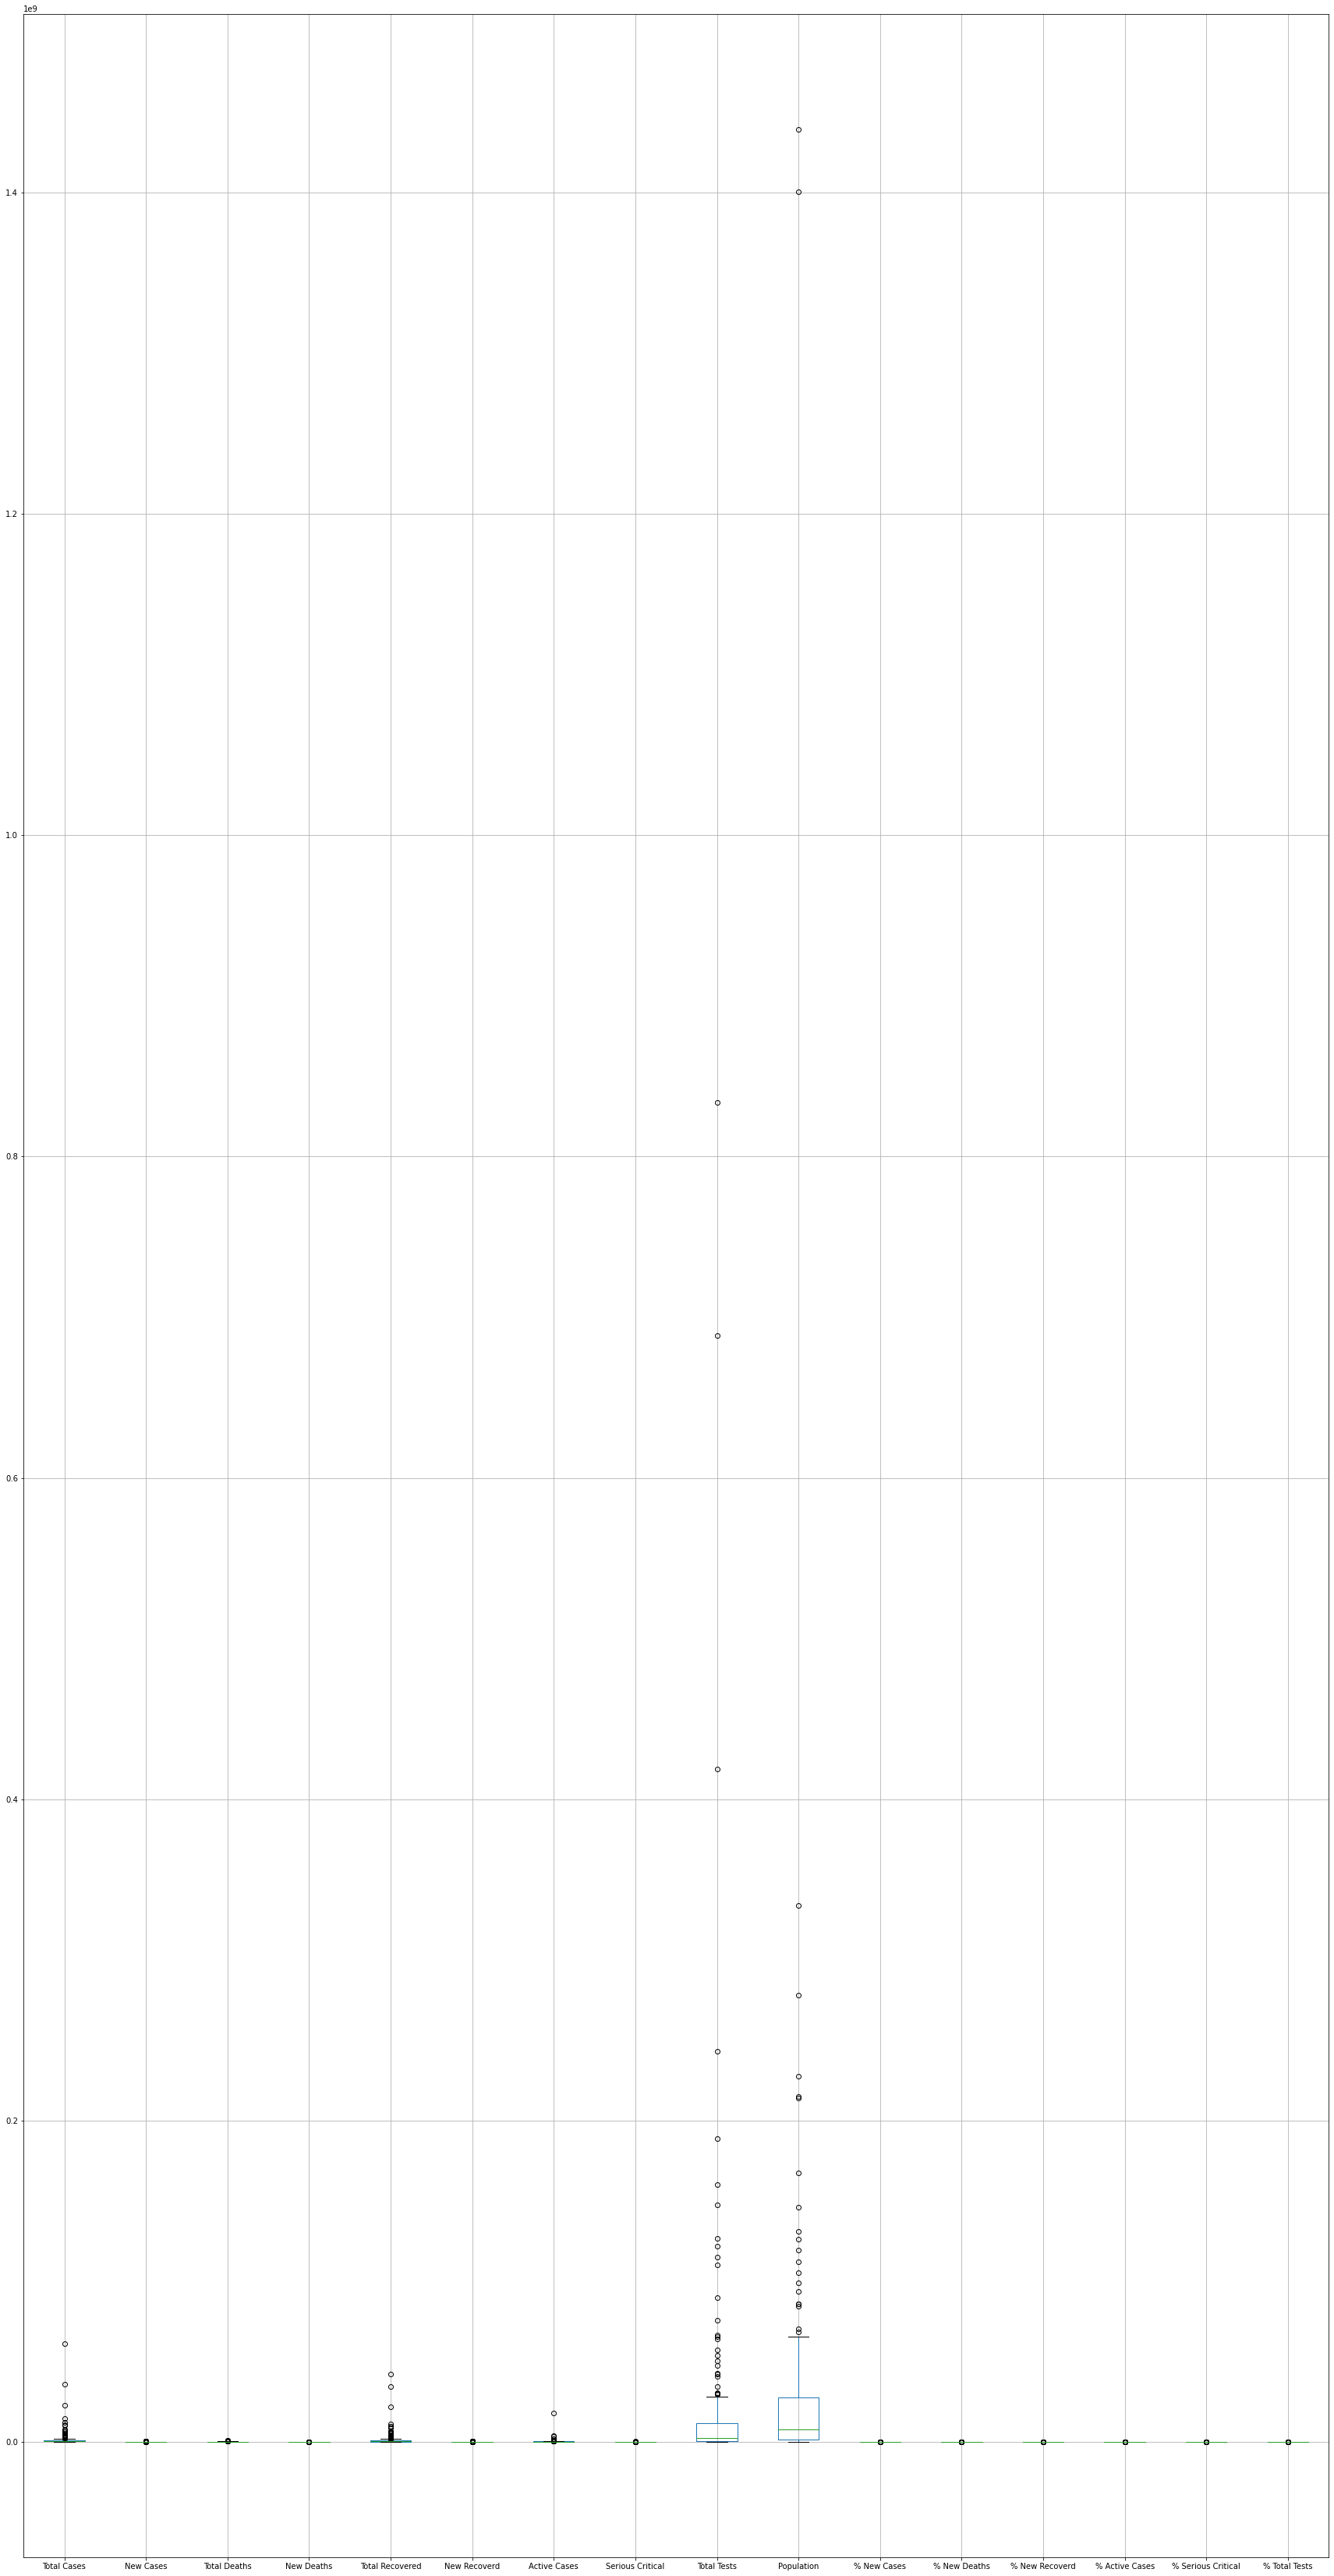

In [259]:
_, bp = pd.DataFrame.boxplot(df, return_type='both', figsize= (30,60))

From this graph, the Total test and population have too many otliners.

* Find outliner value

In [260]:
outliers = [flier.get_ydata() for flier in bp["fliers"]]

In [261]:
outliers

[array([60954028.0, 35528004.0, 22499525.0, 14333720.0, 11815121.0,
        10634603.0, 9916725.0, 7500818.0, 7281280.0, 7164906.0, 6237525.0,
        6204925.0, 5300032.0, 4265666.0, 4202091.0, 4083118.0, 3699663.0,
        3521572.0, 3310662.0, 2936740.0, 2783331.0, 2524191.0, 2514464.0,
        2261039.0, 2231686.0, 2096806.0], dtype=object),
 array([468081.0, 159632.0, 49303.0, 146365.0, 303669.0, 16568.0, 66237.0,
        42422.0, 197535.0, 101689.0, 31170.0, 10901.0, 28023.0, 7759.0,
        27890.0, 26323.0, 32322.0, 8263.0, 24694.0, 16553.0, 35643.0,
        27494.0, 37670.0, 26122.0, 11604.0, 115507.0, 8817.0, 11190.0],
       dtype=object),
 array([859046.0, 483790.0, 619981.0, 150057.0, 125348.0, 315400.0,
        83529.0, 114652.0, 138881.0, 89934.0, 117465.0, 131847.0, 130288.0,
        144127.0, 99720.0, 300101.0, 97164.0, 92371.0, 52135.0, 36571.0,
        34117.0, 58997.0, 39251.0, 39780.0, 33699.0], dtype=object),
 array([669.0, 327.0, 103.0, 313.0, 142.0, 796.0, 141.0

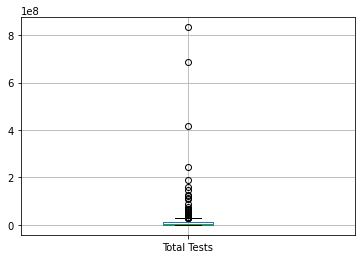

In [262]:
bp = df.boxplot(column='Total Tests')

From this result the Total Test have the most outliners.

* Expolre the total tests are more than 5000000

In [263]:
df[df['Total Tests'] > 5000000] 

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
1,China,103454,159.0,4636.0,0.0,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia,0.153691,0.000000,0.158196,3.254587,0.026099,11.116331
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,418708539.0,6.842765e+07,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Singapore,284802,811.0,837.0,0.0,278433,674.0,5532,11.0,21098774.0,5.920216e+06,Asia,0.284759,0.000000,0.242069,1.942402,0.003862,356.385206
102,Cyprus,201360,3959.0,654.0,4.0,124370,0.0,76336,60.0,9477138.0,1.220707e+06,Asia,1.966130,0.611621,0.000000,37.910211,0.029797,776.364680
165,Taiwan,17302,44.0,850.0,0.0,15955,6.0,497,0.0,9475447.0,2.388226e+07,Asia,0.254306,0.000000,0.037606,2.872500,0.000000,39.675671
170,New Zealand,14596,71.0,51.0,0.0,13406,0.0,1139,17.0,5656046.0,5.002100e+06,Australia/Oceania,0.486435,0.000000,0.000000,7.803508,0.116470,113.073429


I leave the outliners because the total test depends on the people who use the test kit each day and the population. Some country has more population, it will have more total tests. The outliners of the population are left too because the number of people depends on the country size.

### Step 3: Perform exploratory analysis

**3.1 Explore the statistic**

* Explore the statistic by describe()

In [213]:
df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
count,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,1.990000e+02,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1.524635e+06,11172.979899,26619.130653,26.025126,1.292162e+06,3070.648241,2.058543e+05,468.150754,2.383850e+07,3.893949e+07,0.834213,0.174778,0.478345,15.365925,0.030997,147.565662
std,5.519307e+06,45812.662119,90316.442549,88.756245,4.391056e+06,9333.965634,1.319160e+06,1934.236928,8.666450e+07,1.473835e+08,1.611636,0.501020,2.026817,19.795006,0.063510,259.465198
min,1.100000e+02,0.000000,1.000000,0.000000,4.700000e+01,0.000000,9.000000e+00,0.000000,3.648000e+03,4.997000e+03,0.000000,0.000000,0.000000,0.100730,0.000000,0.512426
25%,2.699450e+04,0.000000,319.500000,0.000000,1.916050e+04,0.000000,2.603000e+03,1.000000,3.996030e+05,1.247840e+06,0.000000,0.000000,0.000000,3.268014,0.001393,14.402371
50%,2.013600e+05,485.000000,2471.000000,1.000000,1.457800e+05,120.000000,1.132800e+04,21.000000,2.075449e+06,7.435809e+06,0.286592,0.022492,0.062665,8.952665,0.015784,60.659160
75%,8.073070e+05,3092.500000,13307.500000,9.500000,6.996640e+05,1116.500000,4.993750e+04,164.000000,1.161241e+07,2.745834e+07,0.918250,0.139241,0.282855,18.702540,0.032607,161.048224
max,6.095403e+07,468081.000000,859046.000000,796.000000,4.222117e+07,53694.000000,1.787381e+07,22445.000000,8.336132e+08,1.439324e+09,13.164196,4.476276,26.611547,98.216178,0.709842,1889.654461


* Explore sum in each column and delete the columns which are non-numeric data

In [214]:
df.drop(columns=["Country","Continent"]).sum()

Total Cases           3.034024e+08
New Cases             2.223423e+06
Total Deaths          5.297207e+06
New Deaths            5.179000e+03
Total Recovered       2.571402e+08
New Recoverd          6.110590e+05
Active Cases          4.096501e+07
Serious Critical      9.316200e+04
Total Tests           4.743861e+09
Population            7.748959e+09
% New Cases           1.660084e+02
% New Deaths          3.478089e+01
% New Recoverd        9.519064e+01
% Active Cases        3.057819e+03
% Serious Critical    6.168340e+00
% Total Tests         2.936557e+04
dtype: float64

* Explore sum in each column and exclude the columns which contain percentages

In [215]:
df.drop(columns=["Continent"]).loc[:,"Total Cases":"% Total Tests"].mean()

Total Cases           1.524635e+06
New Cases             1.117298e+04
Total Deaths          2.661913e+04
New Deaths            2.602513e+01
Total Recovered       1.292162e+06
New Recoverd          3.070648e+03
Active Cases          2.058543e+05
Serious Critical      4.681508e+02
Total Tests           2.383850e+07
Population            3.893949e+07
% New Cases           8.342130e-01
% New Deaths          1.747783e-01
% New Recoverd        4.783449e-01
% Active Cases        1.536593e+01
% Serious Critical    3.099668e-02
% Total Tests         1.475657e+02
dtype: float64

* Compute the median except the percentage columns

In [216]:
df.drop(columns=["Continent"]).loc[:,"Total Cases":"% Total Tests"].median()

Total Cases           2.013600e+05
New Cases             4.850000e+02
Total Deaths          2.471000e+03
New Deaths            1.000000e+00
Total Recovered       1.457800e+05
New Recoverd          1.200000e+02
Active Cases          1.132800e+04
Serious Critical      2.100000e+01
Total Tests           2.075449e+06
Population            7.435809e+06
% New Cases           2.865923e-01
% New Deaths          2.249213e-02
% New Recoverd        6.266494e-02
% Active Cases        8.952665e+00
% Serious Critical    1.578411e-02
% Total Tests         6.065916e+01
dtype: float64

* Count the number of country in each the continent

In [217]:
df.Continent.value_counts()

Africa               52
Asia                 47
Europe               47
North America        35
South America        12
Australia/Oceania     6
Name: Continent, dtype: int64

* Explore correlation or relationship between colums.

In [218]:
df.corr()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
Total Cases,1.000000,0.839045,0.936872,0.731007,0.986693,0.660896,0.835431,0.931859,0.916203,0.464635,-0.017465,-0.037544,-0.031723,-0.026144,-0.001272,0.026800
New Cases,0.839045,1.000000,0.719646,0.626648,0.784697,0.801963,0.849256,0.781265,0.812766,0.287315,0.169575,0.001122,-0.006075,0.070110,-0.002195,0.082265
Total Deaths,0.936872,0.719646,1.000000,0.743926,0.943197,0.559948,0.711768,0.907508,0.792698,0.437369,-0.042052,-0.045531,-0.039061,-0.059655,0.024213,-0.017877
New Deaths,0.731007,0.626648,0.743926,1.000000,0.719836,0.631425,0.611467,0.699510,0.748965,0.313806,-0.003024,0.057035,-0.010959,-0.030499,0.069558,0.029865
Total Recovered,0.986693,0.784697,0.943197,0.719836,1.000000,0.654590,0.735029,0.900729,0.905246,0.524985,-0.030066,-0.042069,-0.035125,-0.056536,-0.003792,0.014652
New Recoverd,0.660896,0.801963,0.559948,0.631425,0.654590,1.000000,0.547905,0.541839,0.706966,0.284931,0.079100,0.008440,0.049860,-0.001445,0.004665,0.101737
Active Cases,0.835431,0.849256,0.711768,0.611467,0.735029,0.547905,1.000000,0.838490,0.765811,0.166564,0.029885,-0.013930,-0.013136,0.082889,0.005645,0.064582
Serious Critical,0.931859,0.781265,0.907508,0.699510,0.900729,0.541839,0.838490,1.000000,0.806194,0.390298,-0.016303,-0.014894,-0.026728,-0.008984,0.152846,-0.008910
Total Tests,0.916203,0.812766,0.792698,0.748965,0.905246,0.706966,0.765811,0.806194,1.000000,0.585523,0.012777,-0.015257,-0.025704,-0.009948,-0.006268,0.157635
Population,0.464635,0.287315,0.437369,0.313806,0.524985,0.284931,0.166564,0.390298,0.585523,1.000000,-0.061465,-0.037514,-0.031634,-0.098545,0.026238,-0.088368


* Explore the minimum value every columns

In [219]:
df.max()

Country                    Zimbabwe
Total Cases                60954028
New Cases                  468081.0
Total Deaths               859046.0
New Deaths                    796.0
Total Recovered            42221173
New Recoverd                53694.0
Active Cases               17873809
Serious Critical            22445.0
Total Tests             833613178.0
Population             1439323776.0
Continent             South America
% New Cases               13.164196
% New Deaths               4.476276
% New Recoverd            26.611547
% Active Cases            98.216178
% Serious Critical         0.709842
% Total Tests           1889.654461
dtype: object

* Explore the maximum value every columns

In [220]:
df.min()

Country               Afghanistan
Total Cases                   110
New Cases                     0.0
Total Deaths                  1.0
New Deaths                    0.0
Total Recovered                47
New Recoverd                  0.0
Active Cases                    9
Serious Critical              0.0
Total Tests                3648.0
Population                 4997.0
Continent                  Africa
% New Cases                   0.0
% New Deaths                  0.0
% New Recoverd                0.0
% Active Cases            0.10073
% Serious Critical            0.0
% Total Tests            0.512426
dtype: object

* Explore the top ten coutry in the Total Cases columns 

In [221]:
df.nlargest(10, columns='Total Cases')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,418708539.0,6.842765e+07,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
6,France,11815121,303669.0,125348.0,142.0,8500643,48280.0,3189130,3333.0,188795159.0,6.549292e+07,Europe,2.570173,0.113285,0.567957,26.991937,0.028210,288.268035
7,Russia,10634603,16568.0,315400.0,796.0,9666161,20449.0,653042,2300.0,242900000.0,1.460295e+08,Europe,0.155793,0.252378,0.211552,6.140728,0.021628,166.336223
8,Turkey,9916725,66237.0,83529.0,141.0,9281458,34592.0,551738,1128.0,121838977.0,8.571700e+07,Asia,0.667932,0.168804,0.372700,5.563712,0.011375,142.140977
9,Germany,7500818,42422.0,114652.0,161.0,6692700,27900.0,693466,4636.0,89622218.0,8.419089e+07,Europe,0.565565,0.140425,0.416872,9.245205,0.061807,106.451204
10,Italy,7281280,197535.0,138881.0,184.0,5323523,52529.0,1818876,1557.0,147165930.0,6.032675e+07,Europe,2.712916,0.132488,0.986734,24.980168,0.021384,243.948046
11,Spain,7164906,0.0,89934.0,0.0,5145880,0.0,1929092,2005.0,66213858.0,4.678229e+07,Europe,0.000000,0.000000,0.000000,26.924177,0.027984,141.536163


* Explore the lowest of ten coutry in Total Cases columns

In [222]:
df.nsmallest(10, columns='Total Cases')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
210,Montserrat,110,10.0,1.0,0.0,47,0.0,62,0.0,3648.0,4997.0,North America,9.090909,0.000000,0.000000,56.363636,0.000000,73.003802
208,Wallis and Futuna,454,0.0,7.0,0.0,438,0.0,9,0.0,20508.0,10940.0,Australia/Oceania,0.000000,0.000000,0.000000,1.982379,0.000000,187.458867
207,Anguilla,1777,0.0,6.0,0.0,1702,0.0,69,0.0,51382.0,15206.0,North America,0.000000,0.000000,0.000000,3.882949,0.000000,337.906090
205,Bhutan,2760,7.0,3.0,0.0,2654,0.0,103,0.0,1325250.0,784508.0,Asia,0.253623,0.000000,0.000000,3.731884,0.000000,168.927532
204,Turks and Caicos,3880,0.0,27.0,1.0,3396,0.0,457,0.0,94789.0,39512.0,North America,0.000000,3.703704,0.000000,11.778351,0.000000,239.899271
203,Saint Kitts and Nevis,4056,152.0,28.0,0.0,3004,58.0,1024,1.0,60991.0,53770.0,North America,3.747535,0.000000,1.930759,25.246548,0.024655,113.429422
201,Caribbean Netherlands,4395,99.0,23.0,0.0,3339,0.0,1033,0.0,30126.0,26593.0,North America,2.252560,0.000000,0.000000,23.503982,0.000000,113.285451
200,Greenland,4499,504.0,1.0,0.0,2761,0.0,1737,2.0,150032.0,56920.0,North America,11.202489,0.000000,0.000000,38.608580,0.044454,263.583978
199,Sao Tome and Principe,4735,319.0,63.0,1.0,3732,31.0,940,0.0,29036.0,225334.0,Africa,6.737064,1.587302,0.830654,19.852165,0.000000,12.885761
198,Antigua and Barbuda,4844,129.0,119.0,0.0,4111,14.0,614,1.0,18559.0,99160.0,North America,2.663088,0.000000,0.340550,12.675475,0.020644,18.716216


* Explore the top ten coutry in the Total Deaths columns

In [223]:
df.nlargest(10, columns='Total Deaths')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
7,Russia,10634603,16568.0,315400.0,796.0,9666161,20449.0,653042,2300.0,242900000.0,1.460295e+08,Europe,0.155793,0.252378,0.211552,6.140728,0.021628,166.336223
17,Mexico,4083118,28023.0,300101.0,168.0,3330210,4652.0,452807,4798.0,12630545.0,1.309896e+08,North America,0.686314,0.055981,0.139691,11.089736,0.117508,9.642406
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,418708539.0,6.842765e+07,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
15,Indonesia,4265666,479.0,144127.0,6.0,4115747,175.0,5792,0.0,65280048.0,2.779152e+08,Asia,0.011229,0.004163,0.004252,0.135782,0.000000,23.489197
10,Italy,7281280,197535.0,138881.0,184.0,5323523,52529.0,1818876,1557.0,147165930.0,6.032675e+07,Europe,2.712916,0.132488,0.986734,24.980168,0.021384,243.948046
13,Iran,6204925,701.0,131847.0,26.0,6050483,1526.0,22595,1889.0,42484271.0,8.562500e+07,Asia,0.011297,0.019720,0.025221,0.364146,0.030444,49.616667
14,Colombia,5300032,31170.0,130288.0,38.0,5029052,12292.0,140692,342.0,30272205.0,5.170635e+07,South America,0.588110,0.029166,0.244420,2.654550,0.006453,58.546395


* Explore the lowest of ten coutry in Total Deaths columns

In [224]:
df.nsmallest(10, columns='Total Deaths')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
200,Greenland,4499,504.0,1.0,0.0,2761,0.0,1737,2.0,150032.0,56920.0,North America,11.202489,0.000000,0.000000,38.608580,0.044454,263.583978
210,Montserrat,110,10.0,1.0,0.0,47,0.0,62,0.0,3648.0,4997.0,North America,9.090909,0.000000,0.000000,56.363636,0.000000,73.003802
205,Bhutan,2760,7.0,3.0,0.0,2654,0.0,103,0.0,1325250.0,784508.0,Asia,0.253623,0.000000,0.000000,3.731884,0.000000,168.927532
207,Anguilla,1777,0.0,6.0,0.0,1702,0.0,69,0.0,51382.0,15206.0,North America,0.000000,0.000000,0.000000,3.882949,0.000000,337.906090
208,Wallis and Futuna,454,0.0,7.0,0.0,438,0.0,9,0.0,20508.0,10940.0,Australia/Oceania,0.000000,0.000000,0.000000,1.982379,0.000000,187.458867
178,Cayman Islands,10618,432.0,12.0,0.0,7136,1899.0,3470,11.0,215963.0,66894.0,North America,4.068563,0.000000,26.611547,32.680354,0.103598,322.843603
189,Faeroe Islands,6855,0.0,15.0,0.0,5533,0.0,1307,5.0,657000.0,49145.0,Europe,0.000000,0.000000,0.000000,19.066375,0.072939,1336.860311
201,Caribbean Netherlands,4395,99.0,23.0,0.0,3339,0.0,1033,0.0,30126.0,26593.0,North America,2.252560,0.000000,0.000000,23.503982,0.000000,113.285451
204,Turks and Caicos,3880,0.0,27.0,1.0,3396,0.0,457,0.0,94789.0,39512.0,North America,0.000000,3.703704,0.000000,11.778351,0.000000,239.899271
203,Saint Kitts and Nevis,4056,152.0,28.0,0.0,3004,58.0,1024,1.0,60991.0,53770.0,North America,3.747535,0.000000,1.930759,25.246548,0.024655,113.429422


* Explore the top ten coutry in the % New Deaths columns

In [225]:
df.nlargest(10, columns='% New Deaths')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
131,Madagascar,54101,1667.0,1117.0,50.0,48278,3570.0,4706,22.0,341346.0,28770419.0,Africa,3.081274,4.476276,7.394673,8.698545,0.040665,1.186448
204,Turks and Caicos,3880,0.0,27.0,1.0,3396,0.0,457,0.0,94789.0,39512.0,North America,0.000000,3.703704,0.000000,11.778351,0.000000,239.899271
182,Eritrea,8303,41.0,82.0,2.0,7938,35.0,283,0.0,23693.0,3620927.0,Africa,0.493797,2.439024,0.440917,3.408407,0.000000,0.654335
113,Laos,117956,1066.0,430.0,9.0,7660,321.0,109866,0.0,928834.0,7435809.0,Asia,0.903727,2.093023,4.190601,93.141510,0.000000,12.491364
199,Sao Tome and Principe,4735,319.0,63.0,1.0,3732,31.0,940,0.0,29036.0,225334.0,Africa,6.737064,1.587302,0.830654,19.852165,0.000000,12.885761
118,Trinidad and Tobago,96555,485.0,3047.0,37.0,75804,0.0,17704,22.0,520520.0,1406372.0,North America,0.502304,1.214309,0.000000,18.335664,0.022785,37.011545
50,Australia,877433,115507.0,2344.0,25.0,378338,0.0,496751,293.0,56833664.0,25949078.0,Australia/Oceania,13.164196,1.066553,0.000000,56.614123,0.033393,219.019974
60,S. Korea,661015,3507.0,5986.0,54.0,561308,11820.0,93721,882.0,15804065.0,51336215.0,Asia,0.530548,0.902105,2.105796,14.178347,0.133431,30.785411
49,Denmark,924949,11604.0,3371.0,28.0,682065,9554.0,239513,78.0,110038094.0,5823186.0,Europe,1.254556,0.830614,1.400746,25.894725,0.008433,1889.654461
128,Fiji,57257,612.0,709.0,5.0,51481,14.0,5067,0.0,480732.0,906310.0,Australia/Oceania,1.068865,0.705219,0.027194,8.849573,0.000000,53.042778


* Explore the top ten lowest of coutry in % New Deaths columns

In [226]:
df.nsmallest(10, columns='% New Deaths')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
1,China,103454,159.0,4636.0,0.0,95451,151.0,3367,27.0,160000000.0,1.439324e+09,Asia,0.153691,0.0,0.158196,3.254587,0.026099,11.116331
11,Spain,7164906,0.0,89934.0,0.0,5145880,0.0,1929092,2005.0,66213858.0,4.678229e+07,Europe,0.000000,0.0,0.000000,26.924177,0.027984,141.536163
35,Israel,1490694,27494.0,8259.0,0.0,1369062,3756.0,113373,172.0,40447512.0,9.326000e+06,Asia,1.844376,0.0,0.274348,7.605384,0.011538,433.706970
37,Switzerland,1476524,0.0,12425.0,0.0,1079721,0.0,384378,297.0,14772127.0,8.750743e+06,Europe,0.000000,0.0,0.000000,26.032628,0.020115,168.809974
38,Sweden,1416650,0.0,15331.0,0.0,1210771,0.0,190548,108.0,15268363.0,1.019491e+07,Europe,0.000000,0.0,0.000000,13.450605,0.007624,149.764598
42,Hungary,1282957,0.0,39780.0,0.0,1137648,0.0,105529,291.0,9285125.0,9.623082e+06,Europe,0.000000,0.0,0.000000,8.225451,0.022682,96.488059
45,Kazakhstan,993406,1510.0,13047.0,0.0,961806,0.0,18553,528.0,11575012.0,1.911769e+07,Asia,0.152002,0.0,0.000000,1.867615,0.053150,60.546093
47,Ireland,956720,26122.0,5952.0,0.0,604903,4003.0,345865,83.0,10305100.0,5.021529e+06,Europe,2.730370,0.0,0.661759,36.151120,0.008675,205.218371
52,Nepal,831748,696.0,11602.0,0.0,814006,297.0,6140,114.0,4919776.0,2.993200e+07,Asia,0.083679,0.0,0.036486,0.738204,0.013706,16.436507
61,Guatemala,635613,0.0,16118.0,0.0,609753,0.0,9742,5.0,3325391.0,1.841842e+07,North America,0.000000,0.0,0.000000,1.532694,0.000787,18.054705


* Explore the top ten coutry in % New Cases columns

In [227]:
df.nlargest(10, columns='% New Cases')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
50,Australia,877433,115507.0,2344.0,25.0,378338,0.0,496751,293.0,56833664.0,25949078.0,Australia/Oceania,13.164196,1.066553,0.000000,56.614123,0.033393,219.019974
200,Greenland,4499,504.0,1.0,0.0,2761,0.0,1737,2.0,150032.0,56920.0,North America,11.202489,0.000000,0.000000,38.608580,0.044454,263.583978
210,Montserrat,110,10.0,1.0,0.0,47,0.0,62,0.0,3648.0,4997.0,North America,9.090909,0.000000,0.000000,56.363636,0.000000,73.003802
199,Sao Tome and Principe,4735,319.0,63.0,1.0,3732,31.0,940,0.0,29036.0,225334.0,Africa,6.737064,1.587302,0.830654,19.852165,0.000000,12.885761
178,Cayman Islands,10618,432.0,12.0,0.0,7136,1899.0,3470,11.0,215963.0,66894.0,North America,4.068563,0.000000,26.611547,32.680354,0.103598,322.843603
184,Grenada,7669,292.0,200.0,0.0,5733,3.0,1736,0.0,102338.0,113315.0,North America,3.807537,0.000000,0.052329,22.636589,0.000000,90.312845
203,Saint Kitts and Nevis,4056,152.0,28.0,0.0,3004,58.0,1024,1.0,60991.0,53770.0,North America,3.747535,0.000000,1.930759,25.246548,0.024655,113.429422
151,Curaçao,27915,963.0,193.0,1.0,19396,203.0,8326,3.0,409223.0,165112.0,North America,3.449758,0.518135,1.046608,29.826258,0.010747,247.845705
143,Burundi,34722,1171.0,38.0,0.0,773,0.0,33911,0.0,345742.0,12427552.0,Africa,3.372502,0.000000,0.000000,97.664305,0.000000,2.782060
131,Madagascar,54101,1667.0,1117.0,50.0,48278,3570.0,4706,22.0,341346.0,28770419.0,Africa,3.081274,4.476276,7.394673,8.698545,0.040665,1.186448


* Explore the lowest of ten coutry in % New Cases columns

In [228]:
df.nsmallest(10, columns='% New Cases')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
11,Spain,7164906,0.0,89934.0,0.0,5145880,0.0,1929092,2005.0,66213858.0,46782290.0,Europe,0.0,0.0,0.0,26.924177,0.027984,141.536163
37,Switzerland,1476524,0.0,12425.0,0.0,1079721,0.0,384378,297.0,14772127.0,8750743.0,Europe,0.0,0.0,0.0,26.032628,0.020115,168.809974
38,Sweden,1416650,0.0,15331.0,0.0,1210771,0.0,190548,108.0,15268363.0,10194908.0,Europe,0.0,0.0,0.0,13.450605,0.007624,149.764598
42,Hungary,1282957,0.0,39780.0,0.0,1137648,0.0,105529,291.0,9285125.0,9623082.0,Europe,0.0,0.0,0.0,8.225451,0.022682,96.488059
61,Guatemala,635613,0.0,16118.0,0.0,609753,0.0,9742,5.0,3325391.0,18418418.0,North America,0.0,0.0,0.0,1.532694,0.000787,18.054705
64,Costa Rica,584547,0.0,7372.0,0.0,561829,0.0,15346,51.0,3015552.0,5164755.0,North America,0.0,0.0,0.0,2.625281,0.008725,58.387126
66,Ecuador,559950,0.0,33699.0,0.0,443880,0.0,82371,759.0,2187626.0,18049678.0,South America,0.0,0.0,0.0,14.710421,0.135548,12.120028
80,Libya,392868,0.0,5778.0,0.0,379736,0.0,7354,137.0,2063958.0,7013128.0,Africa,0.0,0.0,0.0,1.871876,0.034872,29.429921
87,Finland,305522,0.0,1638.0,0.0,46000,0.0,257884,55.0,8803391.0,5553796.0,Europe,0.0,0.0,0.0,84.407669,0.018002,158.511242
88,Bosnia and Herzegovina,297333,0.0,13568.0,0.0,192218,0.0,91547,0.0,1505807.0,3249811.0,Europe,0.0,0.0,0.0,30.789384,0.000000,46.335218


From exploring the maximum and the minimum, the USA have the most total cases and total deaths number whereas compared with in the percentage of new deaths and  new cases, the highest number is in Madagascar and Australia respectively. It can be said that the USA have a higher population so, this country will have higher total cases and total deaths but we consider the percentage, the USA is not the most Covid-19 infection country.
However, the smallest case is Montserrat for Total Cases, Greenland for Total Deaths, China for % New Deaths and Spain for % New Cases.

In conclusion, we need to consider the percenatage comparing the non-percetage and population.

**3.2 Plot the Total case in the map**

Explore the distribution of the data evry country in map

In [329]:
import plotly.express as px

fig = px.choropleth(df, locations ="Country", locationmode="country names", color = df['Total Cases'],
                   hover_name = "Country", title="Case", color_continuous_scale = px.colors.sequential.Inferno)

fig.update(layout_coloraxis_showscale = True)
fig.show()

From this figure, the highest number is yellow colour and the black colour is the lowest case

**3.3 Plot the Total case and Total death in the map**

In [293]:
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots # creating subplots

fig1 = px.choropleth(df, locations ="Country", locationmode="country names", color = df['Total Cases'],
                   hover_name = "Country", title="Case", hover_data = ['Total Cases'])

fig2 = px.choropleth(df, locations ="Country", locationmode="country names", color = df['Total Deaths'],
                   hover_name = "Country", title="Case", hover_data = ['Total Deaths'])

fig = make_subplots(rows =1, cols =2, subplot_titles=['Total Cases','Total Deaths'], specs=[[{'type':'choropleth'},{'type':'choropleth'}]])
fig.add_trace(fig1['data'][0], row =1,col =1)
fig.add_trace(fig2['data'][0], row =1,col =2)
fig.show()

Following two figures, the highest number is yellow colour and the black colour id the lowest case. The USA has the highest total cases and total deaths.

**3.4 Create the table to order the Total Cases in descending order**

In [231]:
top_case = df.sort_values(by='Total Cases',ascending=False).reset_index()
top_case.set_index('Country', inplace=True)
top_case.style.background_gradient(cmap = "cubehelix")


,index,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
Country,,,,,,,,,,,,,,,,,,
USA,2,60954028,468081.000000,859046.000000,669.000000,42221173,48922.000000,17873809,22445.000000,833613178.000000,333950663.000000,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
India,3,35528004,159632.000000,483790.000000,327.000000,34453603,40863.000000,590611,8944.000000,688470959.000000,1400605955.000000,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
Brazil,4,22499525,49303.000000,619981.000000,103.000000,21626836,0.000000,252708,8318.000000,63776166.000000,214854131.000000,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
UK,5,14333720,146365.000000,150057.000000,313.000000,10722342,53694.000000,3461321,868.000000,418708539.000000,68427650.000000,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
France,6,11815121,303669.000000,125348.000000,142.000000,8500643,48280.000000,3189130,3333.000000,188795159.000000,65492922.000000,Europe,2.570173,0.113285,0.567957,26.991937,0.028210,288.268035
Russia,7,10634603,16568.000000,315400.000000,796.000000,9666161,20449.000000,653042,2300.000000,242900000.000000,146029527.000000,Europe,0.155793,0.252378,0.211552,6.140728,0.021628,166.336223
Turkey,8,9916725,66237.000000,83529.000000,141.000000,9281458,34592.000000,551738,1128.000000,121838977.000000,85716997.000000,Asia,0.667932,0.168804,0.372700,5.563712,0.011375,142.140977
Germany,9,7500818,42422.000000,114652.000000,161.000000,6692700,27900.000000,693466,4636.000000,89622218.000000,84190892.000000,Europe,0.565565,0.140425,0.416872,9.245205,0.061807,106.451204
Italy,10,7281280,197535.000000,138881.000000,184.000000,5323523,52529.000000,1818876,1557.000000,147165930.000000,60326751.000000,Europe,2.712916,0.132488,0.986734,24.980168,0.021384,243.948046


**3.5 Plot the top ten country by bar chart**

* Identify the country with highest number of total Covid-19 cases

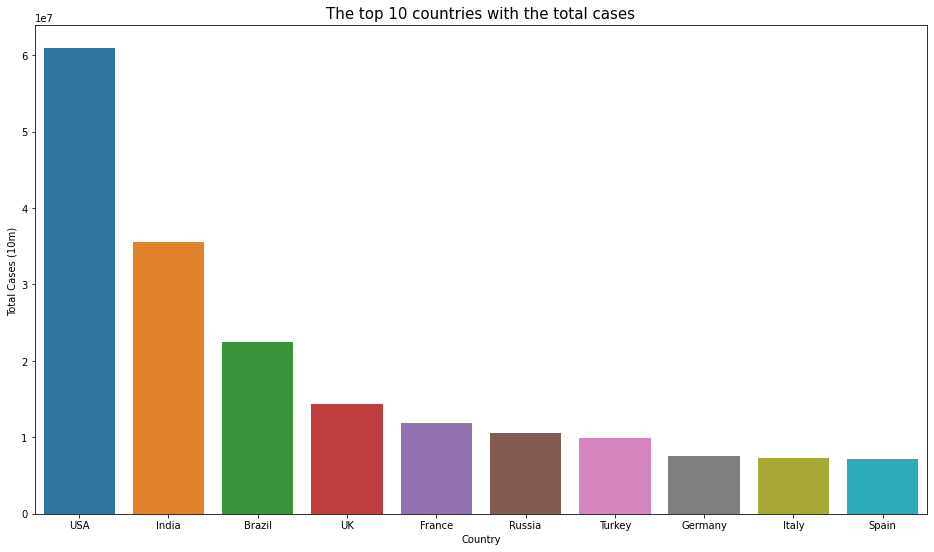

In [232]:
top_totalcase = df.sort_values(by='Total Cases',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Total Cases", x = "Country", linewidth=4);
plt.title("The top 10 countries with the total cases", size = 15)
plt.xlabel("Country")
plt.ylabel("Total Cases (10m) ")
plt.show()

* Identify the country with highest number of new cases

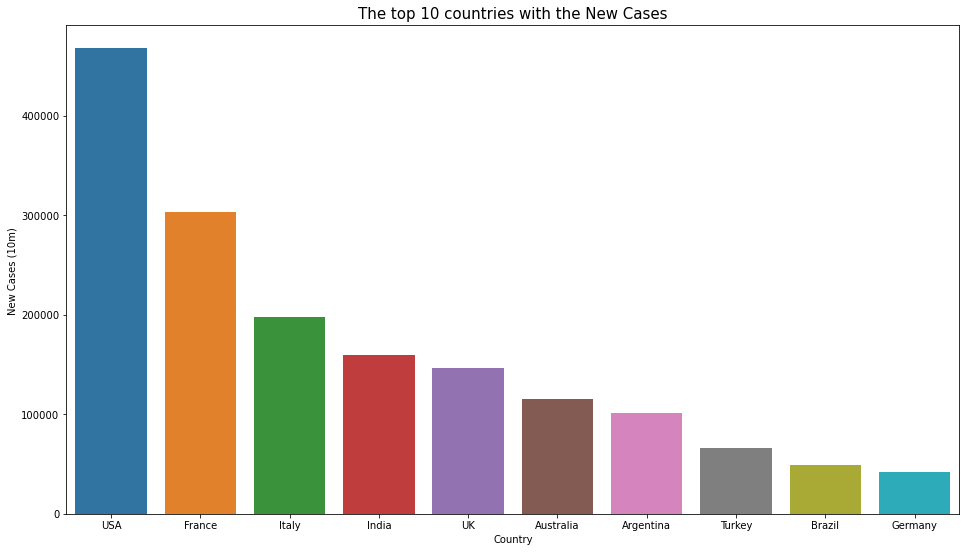

In [283]:
top_totalcase = df.sort_values(by='New Cases',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "New Cases", x = "Country", linewidth=4);
plt.title("The top 10 countries with the New Cases", size = 15)
plt.xlabel("Country")
plt.ylabel("New Cases (10m) ")
plt.show()

* Identify the country with highest number of total deaths 

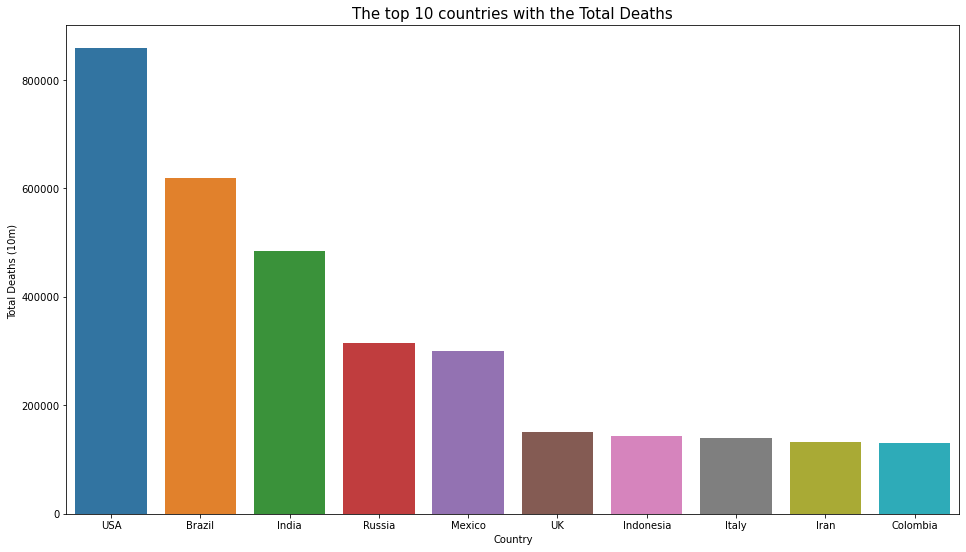

In [287]:
top_totalcase = df.sort_values(by='Total Deaths',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Total Deaths", x = "Country", linewidth=4);
plt.title("The top 10 countries with the Total Deaths", size = 15)
plt.xlabel("Country")
plt.ylabel("Total Deaths (10m) ")
plt.show()

* Identify the country with highest number of new deaths

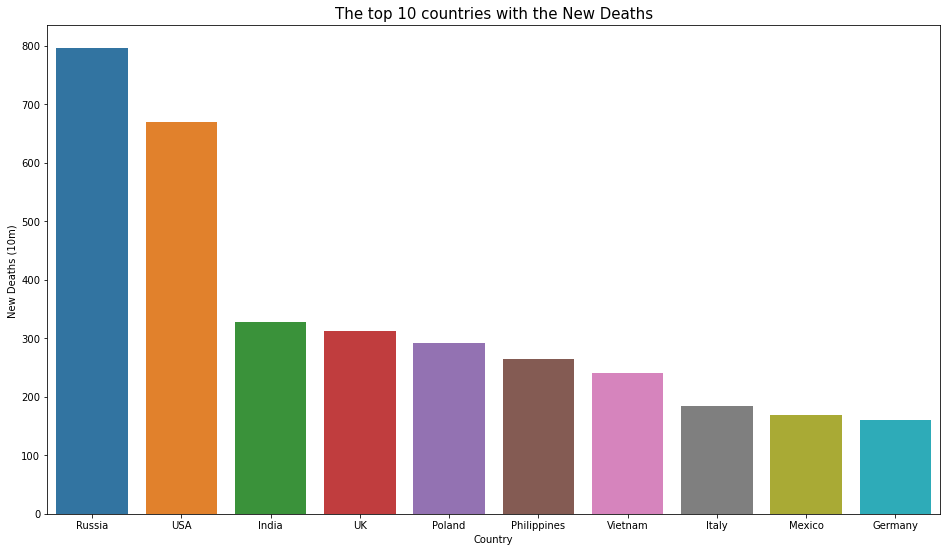

In [291]:
top_totalcase = df.sort_values(by='New Deaths',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "New Deaths", x = "Country", linewidth=4);
plt.title("The top 10 countries with the New Deaths", size = 15)
plt.xlabel("Country")
plt.ylabel("New Deaths (10m) ")
plt.show()

* Identify the country with highest number of total recovered

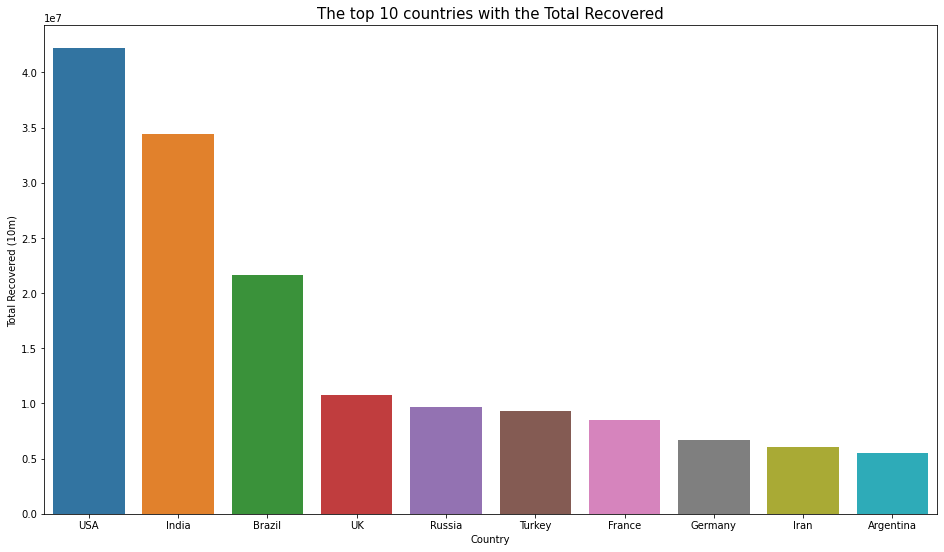

In [294]:
top_totalcase = df.sort_values(by='Total Recovered',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Total Recovered", x = "Country", linewidth=4);
plt.title("The top 10 countries with the Total Recovered", size = 15)
plt.xlabel("Country")
plt.ylabel("Total Recovered (10m) ")
plt.show()

* Identify the country with highest number of New Recoverd

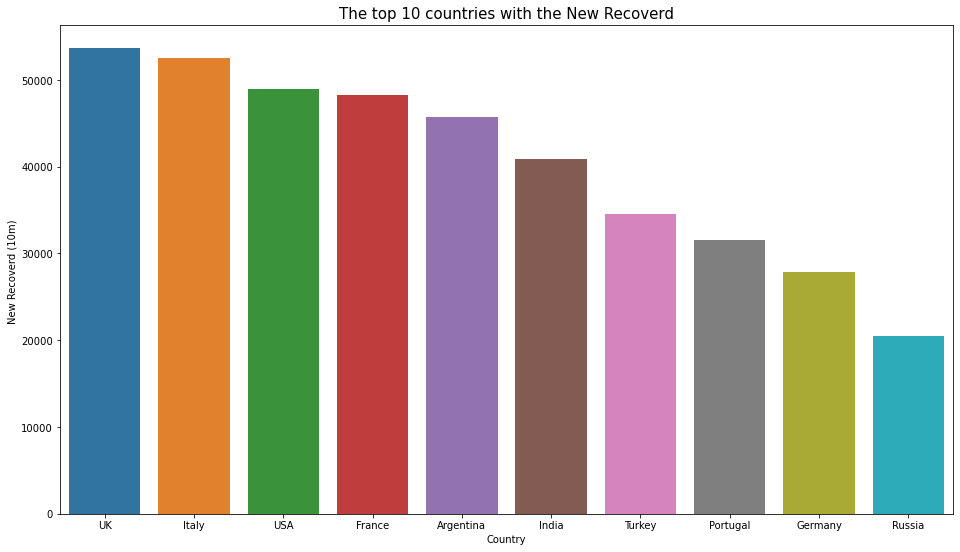

In [296]:
top_totalcase = df.sort_values(by='New Recoverd',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "New Recoverd", x = "Country", linewidth=4);
plt.title("The top 10 countries with the New Recoverd", size = 15)
plt.xlabel("Country")
plt.ylabel("New Recoverd (10m) ")
plt.show()

* Identify the country with highest number of Total Tests

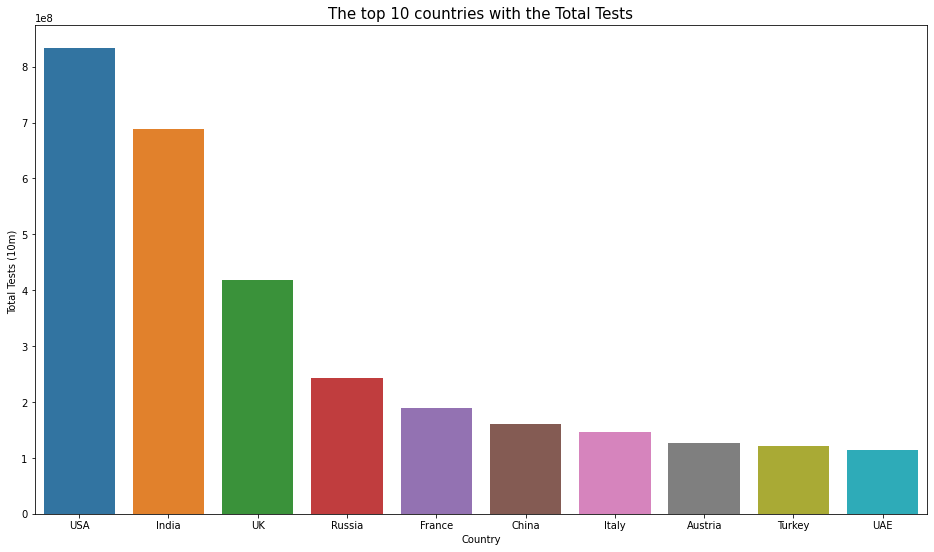

In [298]:
top_totalcase = df.sort_values(by='Total Tests',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Total Tests", x = "Country", linewidth=4);
plt.title("The top 10 countries with the Total Tests", size = 15)
plt.xlabel("Country")
plt.ylabel("Total Tests (10m) ")
plt.show()

* Identify the country with highest number of Active Cases

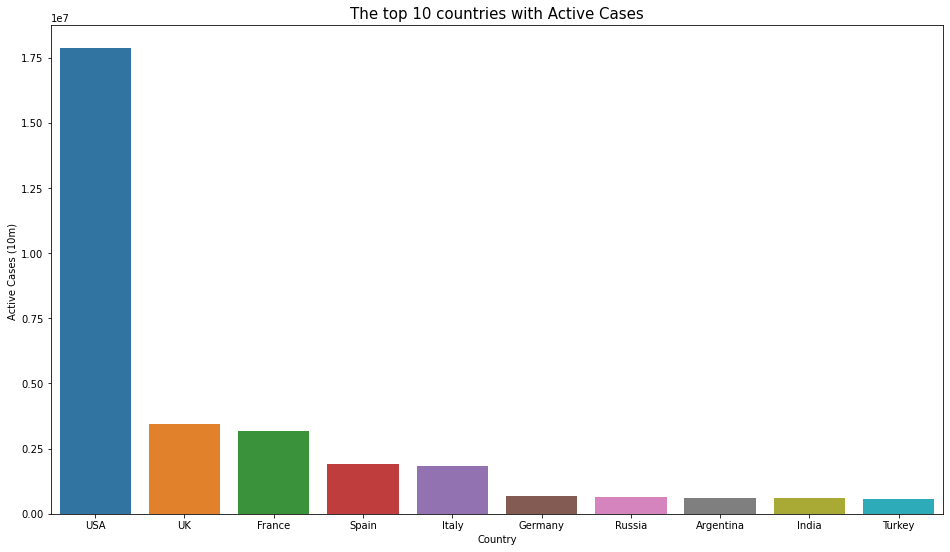

In [301]:
top_totalcase = df.sort_values(by='Active Cases',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Active Cases", x = "Country", linewidth=4);
plt.title("The top 10 countries with Active Cases", size = 15)
plt.xlabel("Country")
plt.ylabel("Active Cases (10m) ")
plt.show()

* Identify the country with highest number of Serious Critical

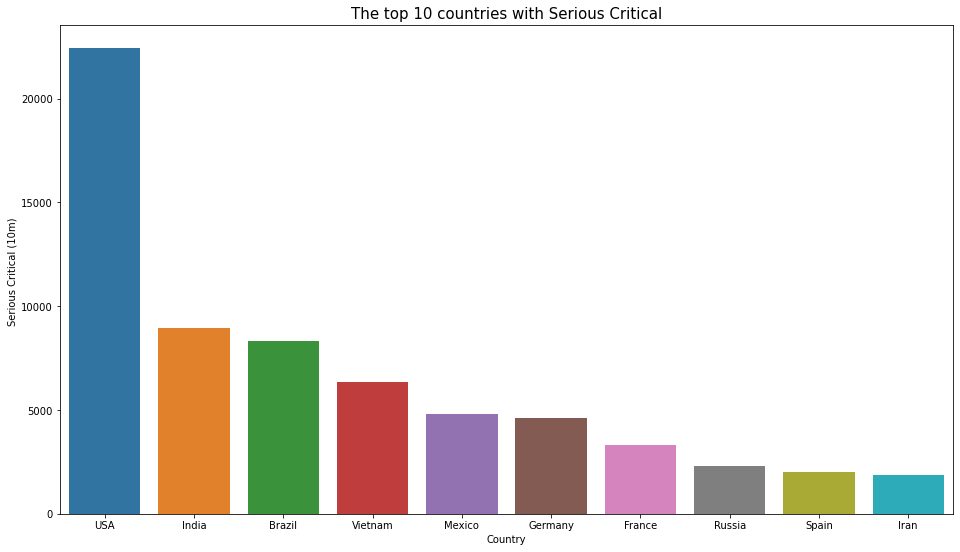

In [304]:
top_totalcase = df.sort_values(by='Serious Critical',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "Serious Critical", x = "Country", linewidth=4);
plt.title("The top 10 countries with Serious Critical", size = 15)
plt.xlabel("Country")
plt.ylabel("Serious Critical (10m) ")
plt.show()

**3.6 plot the popluation in every country**

Text(0, 0.5, ' Population (10m) ')

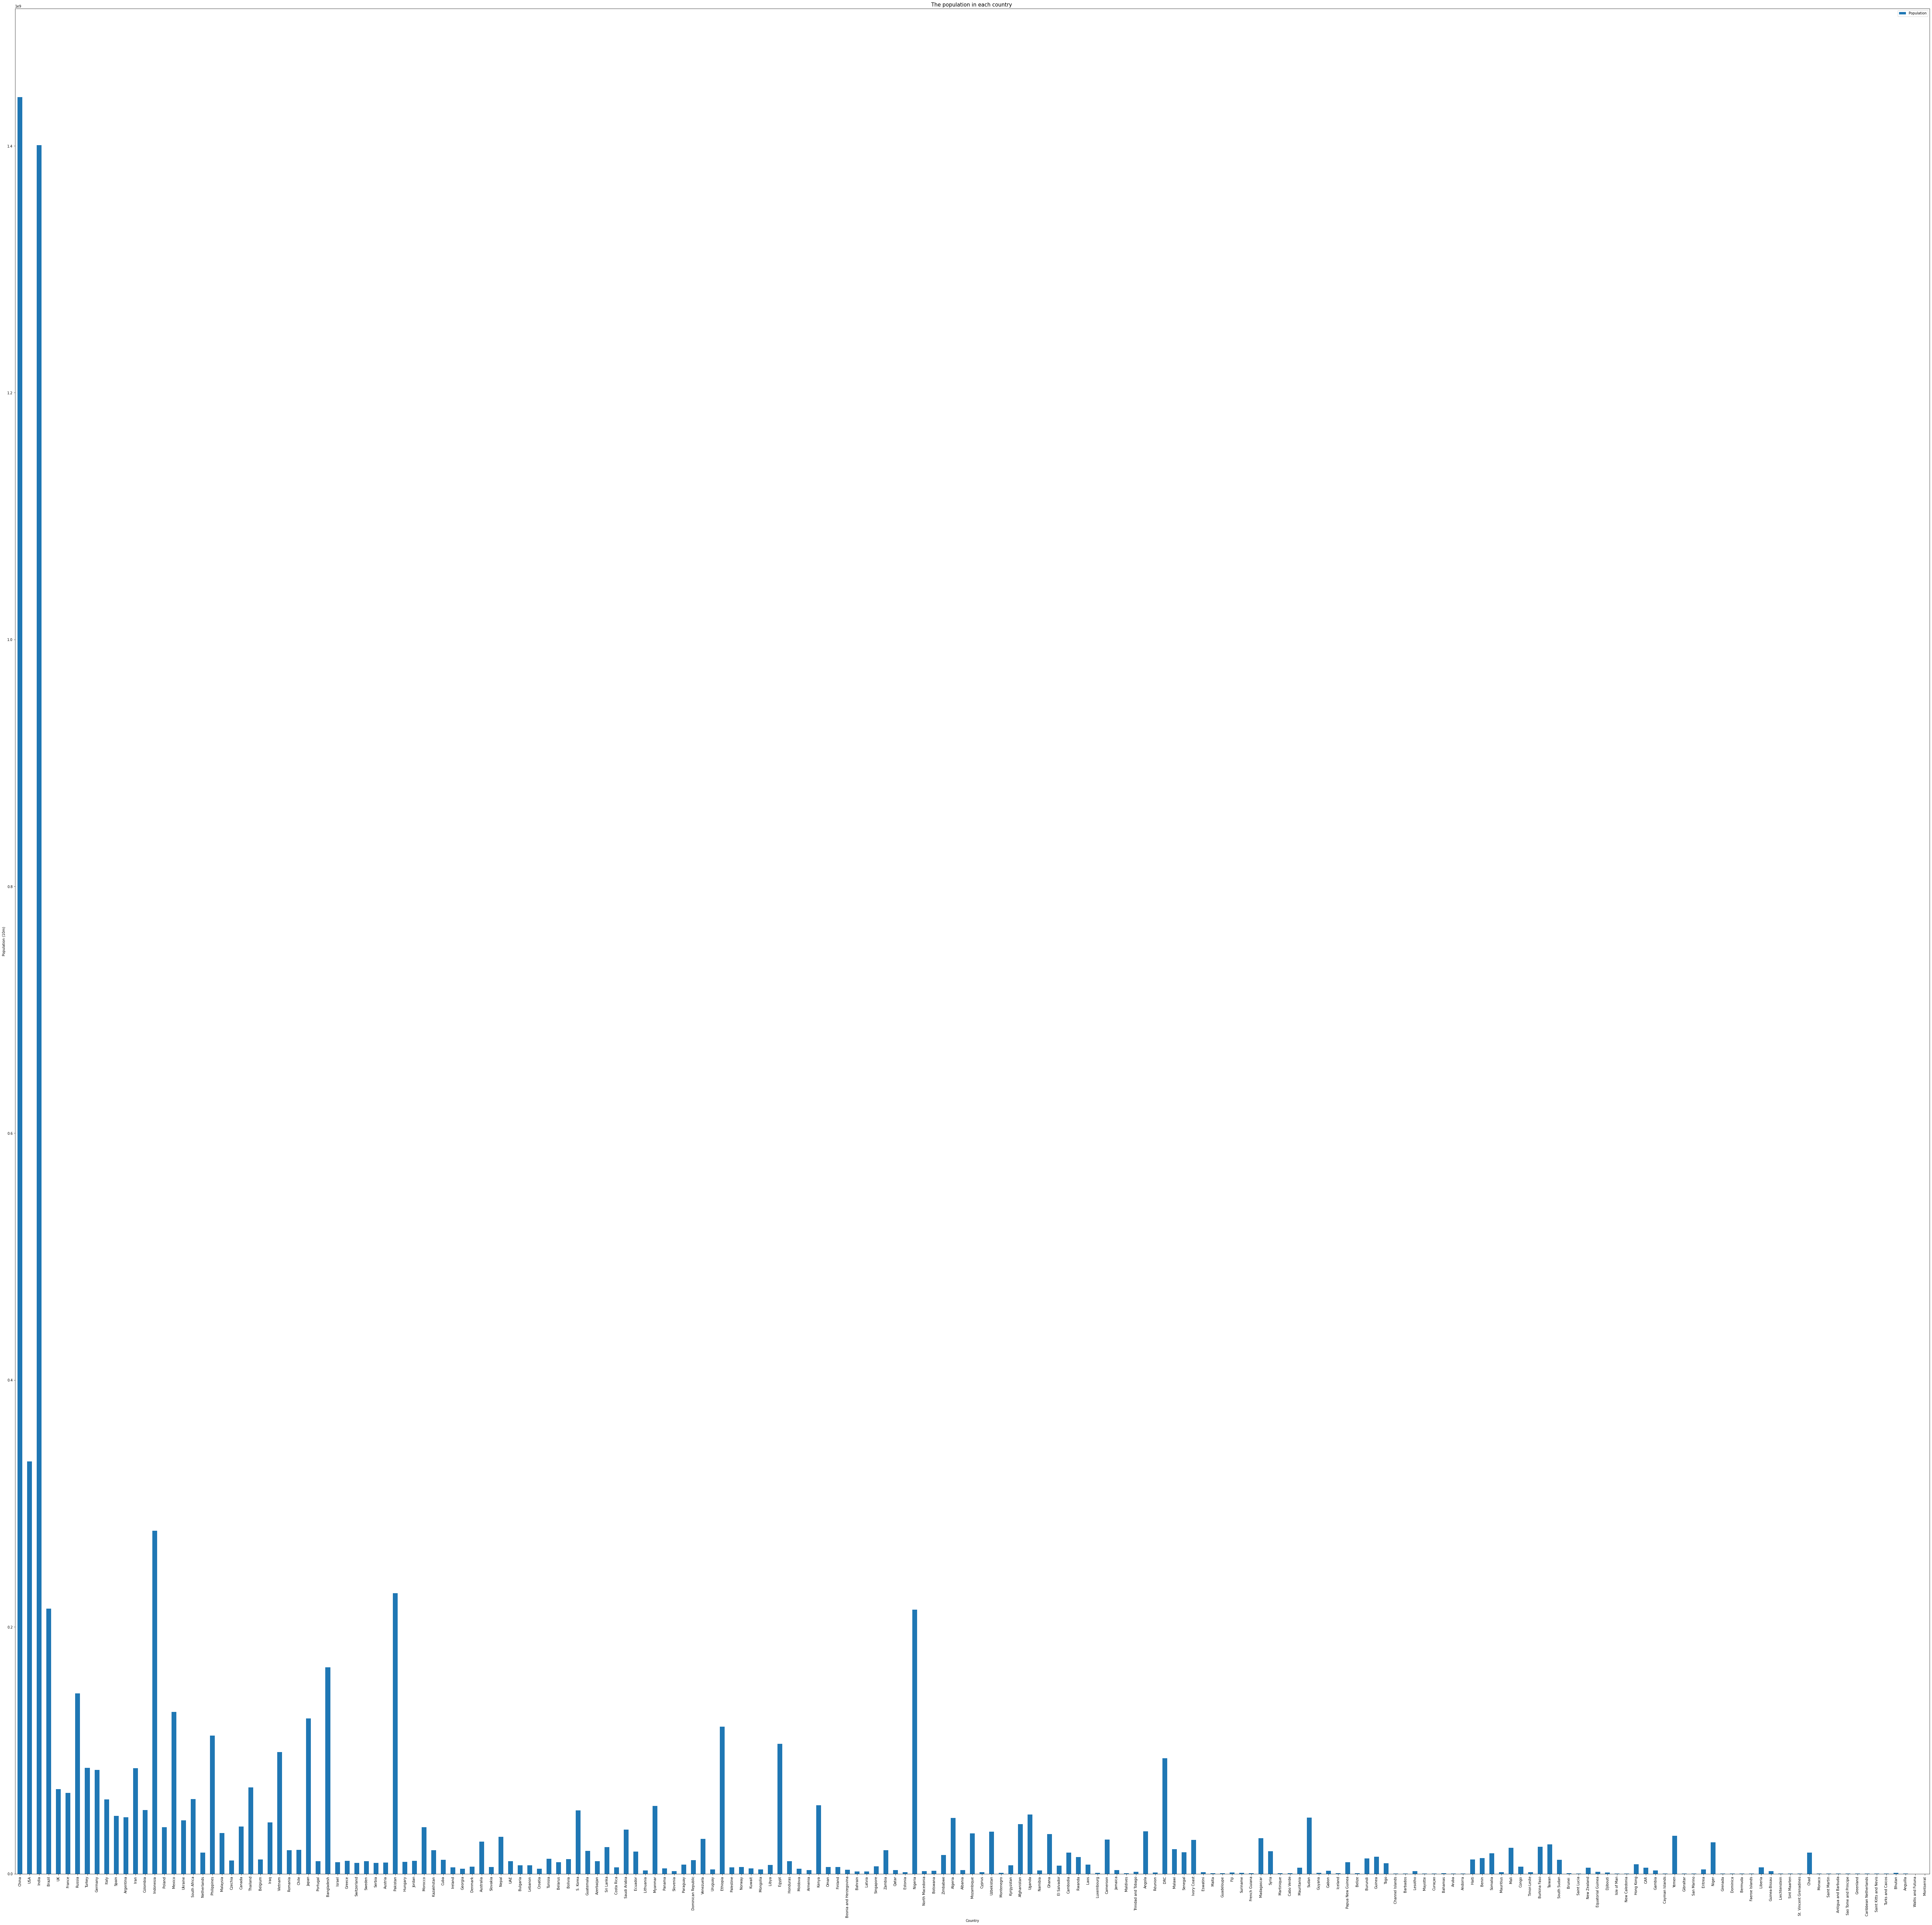

In [321]:
df.plot(kind="bar", x='Country', y='Population',figsize=(100,100));
plt.title("The population in each country ", size = 15)
plt.xlabel("Country")
plt.ylabel(" Population (10m) ")

From those figures in 3.5 and 3.6, the USA has a peak of total cases, new cases, total deaths, total Recovered, active cases, serious critical. However, they also have the second-highest population and excessive total tests so, it can imply that the people in the USA took too much Covid-19 test and the high number of population. As a result of this, it brings the result of this country to be the first rank in Covid-19 cases. When Considering the new recovered, the UK  has the highest value but, this country is in the top ten countries in many COVID-19 cases such as total deaths, total cases, new deaths. In contrast, a peak of new deaths is in Russia followed by the USA. Additionally, Russia is in the top ten in almost every figure.


***Figure 3.6 is not a good visualization due to too much data***

**3.7 Explore the relatiopship the data**

Use the scatter plot to explore the relationship between columns

* Scatter plot to every quantitative variable and then, choose some columns to explore more detail

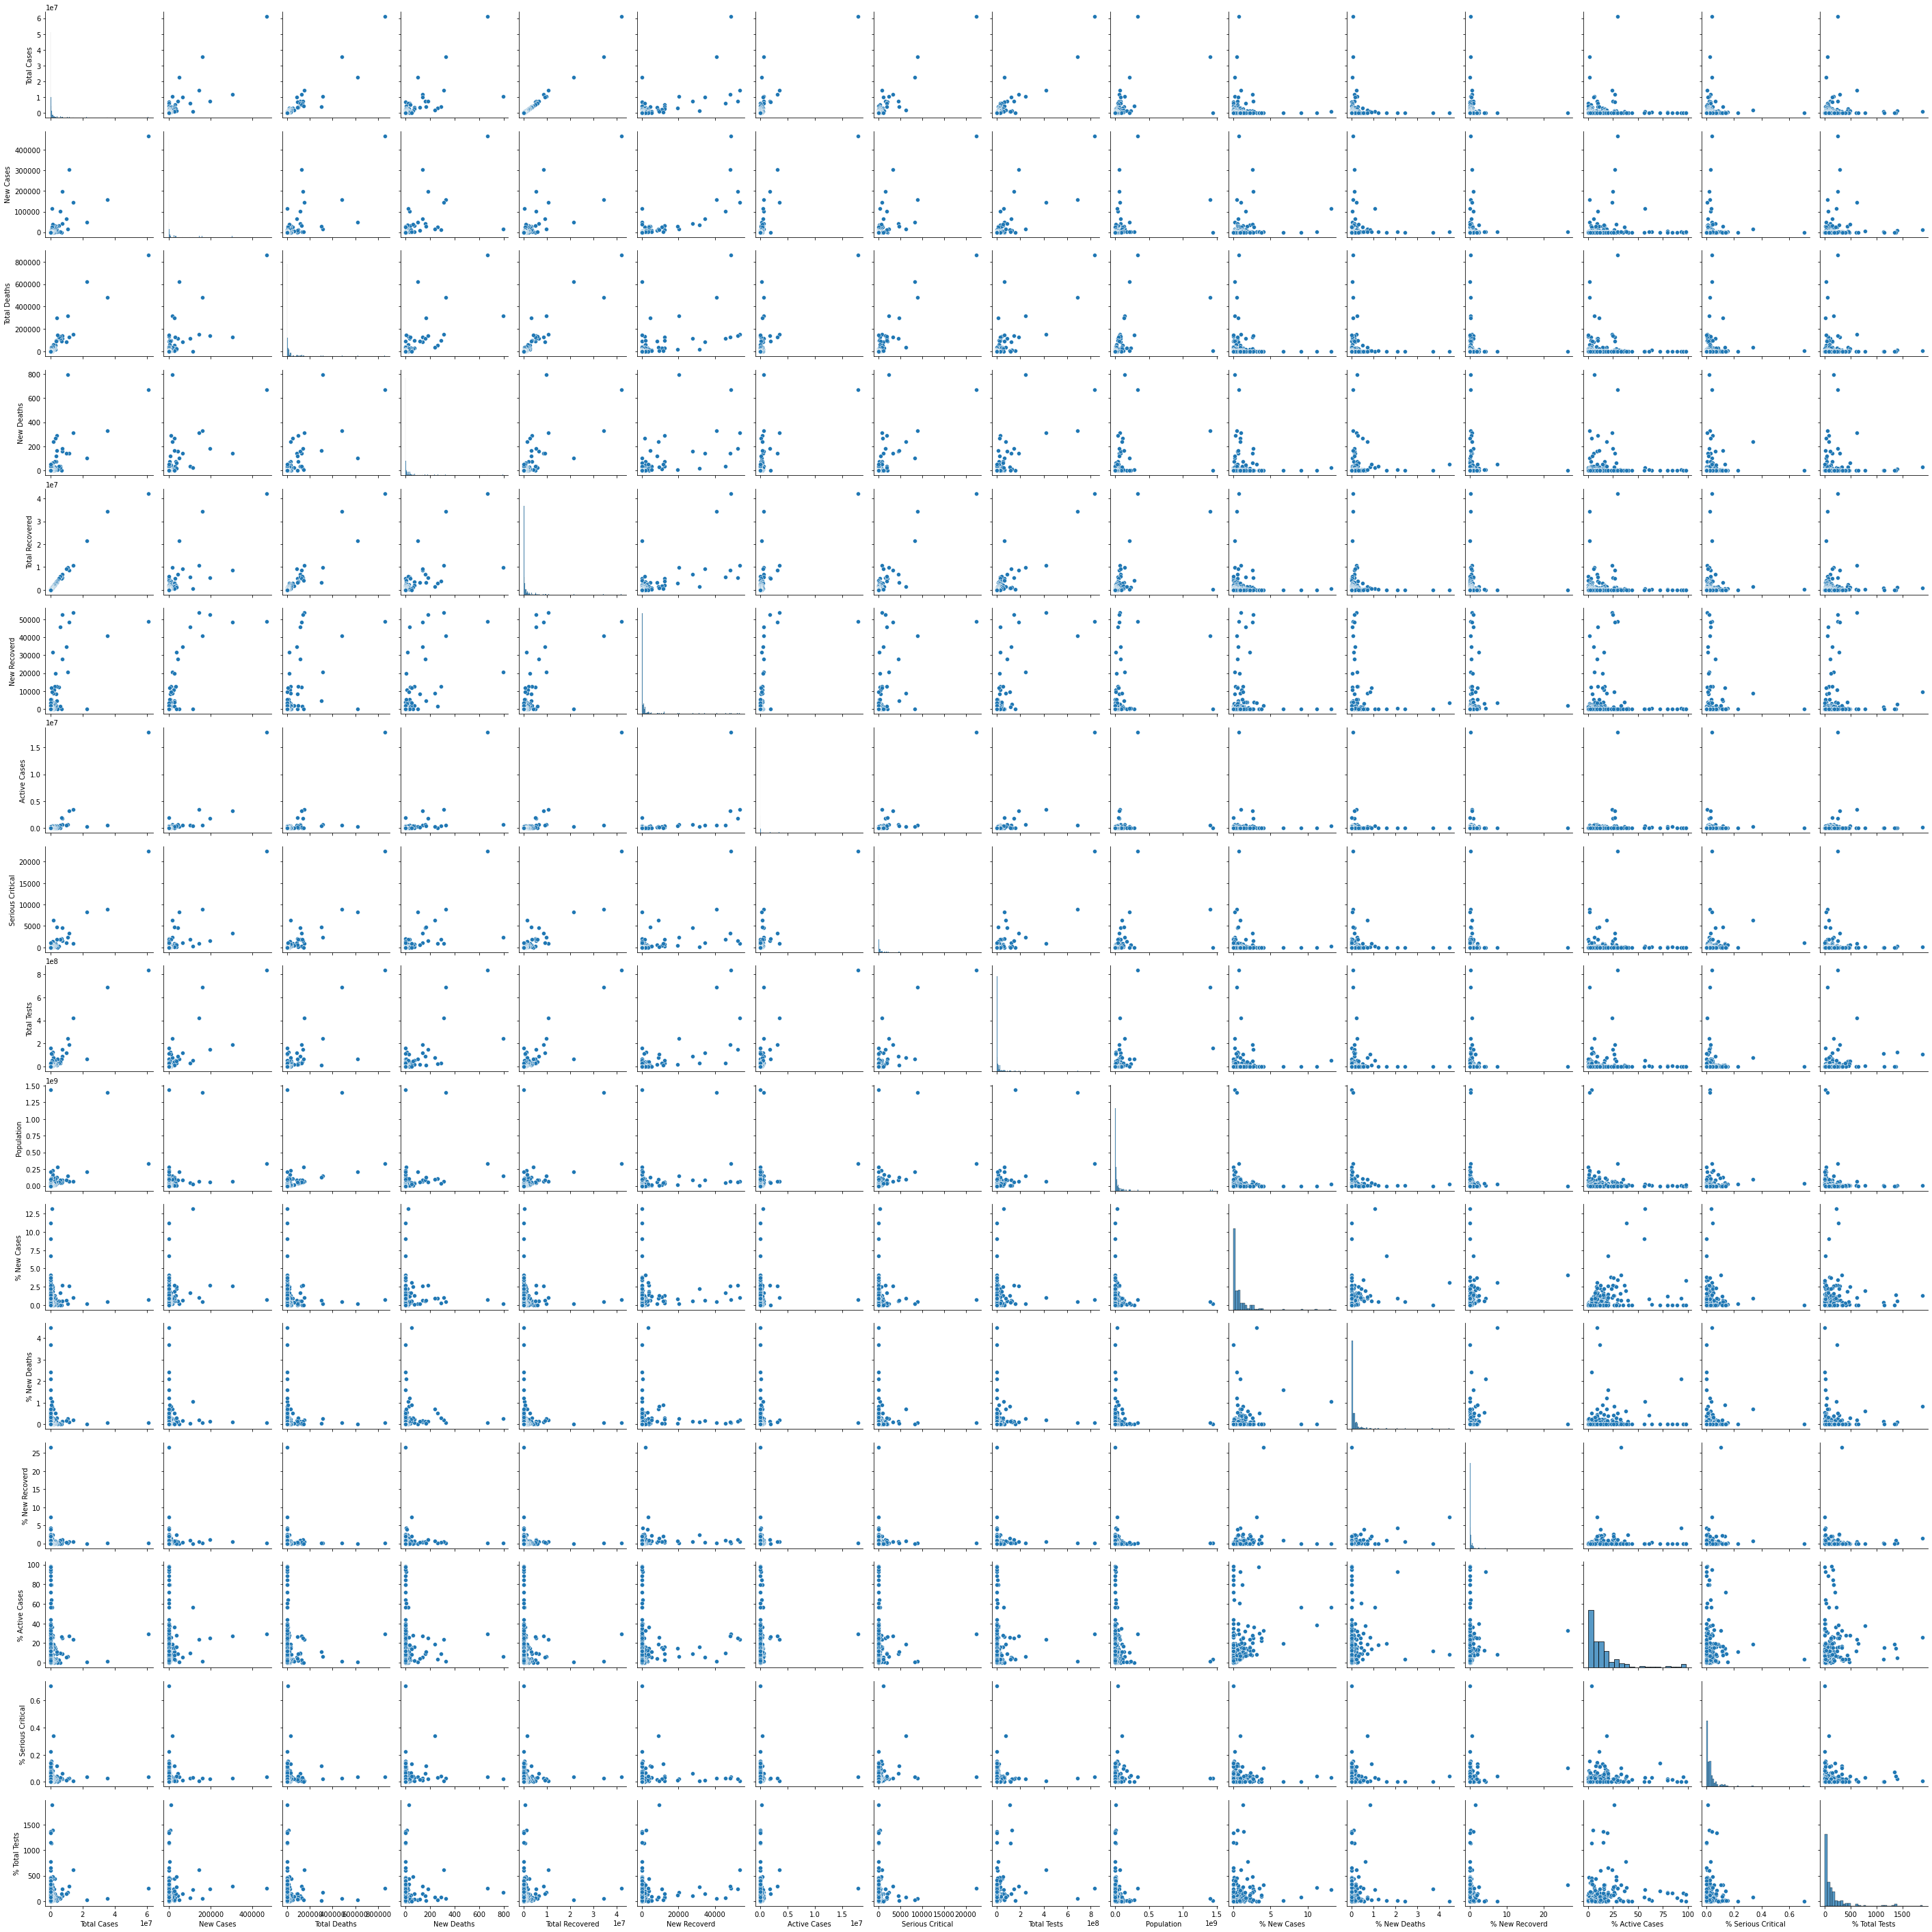

In [240]:
sns.pairplot(df)

Following those figures, I choose the graph which looks like a linear line and some graph has a kind of relationship between two variables. After that, using correlation coefficient explore the relationship of the data.

* Explore Total Cases and Total Deaths

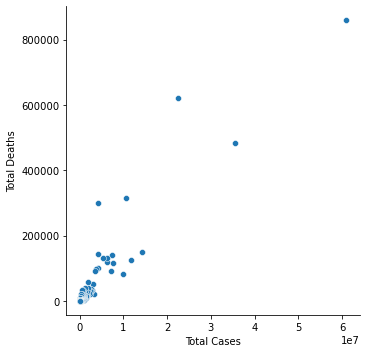

In [243]:
sns.relplot(x="Total Cases", y = "Total Deaths", data=df);

In [244]:
from scipy.stats import pearsonr #import package

data_set1 = df['Total Cases']
data_set2 = df['Total Deaths']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.937


When the correlation is between -1 and +1 except 0, it can be said that there is a strong relationship between them. This can indicate that one variable increased another variable will rise too.

From the result, there is a strong correlation between Total Cases and Total Deaths.

* Explore Total Cases and Total Tests

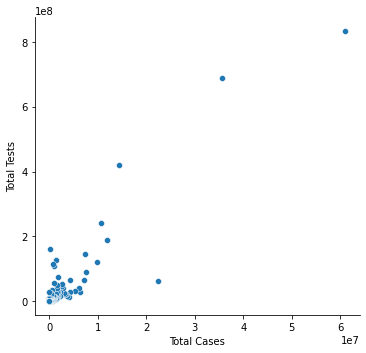

In [245]:
sns.relplot(x="Total Cases", y = "Total Tests", data=df);

In [246]:
data_set1 = df['Total Cases']
data_set2 = df['Total Tests']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.916


There is a strong correlation between Total Cases and Total Tests.

* Explore Total Cases and Serious Critical

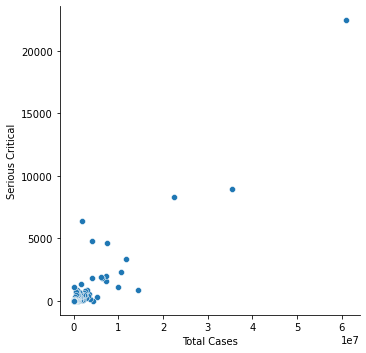

In [247]:
sns.relplot(x="Total Cases", y = "Serious Critical", data=df);

In [248]:
data_set1 = df['Total Cases']
data_set2 = df['Serious Critical']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.932


There is a strong correlation between Total Cases and Serious Critical. The value is positive which means Total Cases increased and Serious Critical will increase.

* Explore Total Deaths and Serious Critical

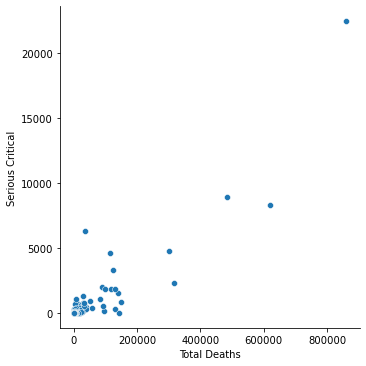

In [249]:
sns.relplot(x="Total Deaths", y = "Serious Critical", data=df);

In [250]:
data_set1 = df['Total Deaths']
data_set2 = df['Serious Critical']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.908


Total Deaths and Serious Critical have a strong correlation or relationship

* Explore New Cases and New Deaths

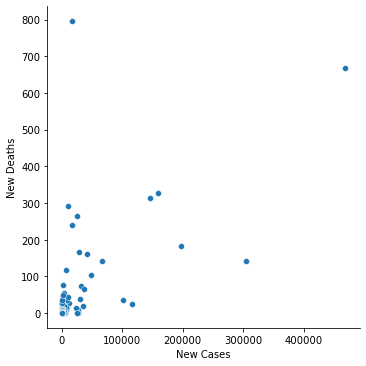

In [251]:
sns.relplot(x="New Cases", y = "New Deaths", data=df);

In [252]:
data_set1 = df['New Cases']
data_set2 = df['New Deaths']
corr, _ = pearsonr(data_set1, data_set2) \
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.627


There is a weak correlation/relationship between Total Cases and Serious Critical

* Explore New Cases and New Recoverd

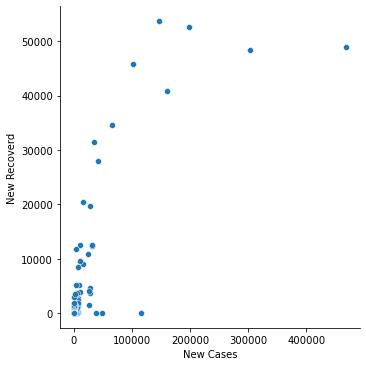

In [253]:
sns.relplot(x="New Cases", y = "New Recoverd", data=df);

In [254]:
data_set1 = df['New Cases']
data_set2 = df['New Recoverd']
corr, _ = pearsonr(data_set1, data_set2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.802


New Cases and New Recoverd have a weak correlation or relationship

* Explore Total Cases and Active Cases

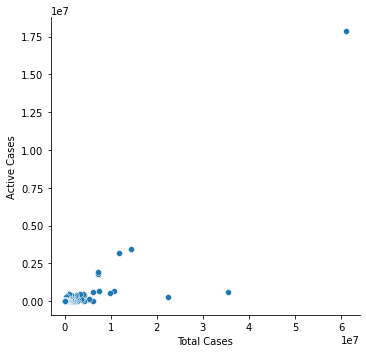

In [255]:
sns.relplot(x="Total Cases", y = "Active Cases", data=df);

In [256]:
data_set1 = df['Total Cases']
data_set2 = df['Active Cases']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.835


Total Cases and Active Cases don't have a strong correlation or relationship.

* Explore Total Cases and Total Recovered in each continent

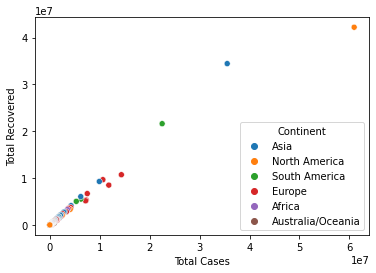

In [257]:
sns.scatterplot(x='Total Cases', y='Total Recovered', hue='Continent' ,data=df);

Total Cases and Total Recovered which are grouped by continent seem to have a relationship and the graph looks like linear.

### Step4: Ask Question

**4.1(Q1). How did Covid-19 affect among the Continent?**

* Explore the cases in the continent

In [233]:
continent = df.groupby(['Continent']).sum().reset_index()
continent.set_index('Continent', inplace=True)
continent

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
Continent,,,,,,,,,,,,,,,,
Africa,10105397,42073.0,230596.0,318.0,8934570,32712.0,940231,2461.0,8.883851e+07,1.317114e+09,35.771272,13.228264,28.964814,890.982838,1.095166,912.882422
Asia,86471470,358348.0,1262841.0,1220.0,82644186,120224.0,2564443,26657.0,1.726506e+09,4.650355e+09,16.966316,6.871652,10.500845,321.175681,2.125046,6782.648064
Australia/Oceania,999116,116190.0,3983.0,30.0,491739,14.0,503394,321.0,6.333906e+07,4.136226e+07,14.719496,1.771772,0.027194,78.293597,0.199784,609.466828
Europe,95422337,951082.0,1549748.0,2383.0,77526389,318529.0,16346200,22441.0,1.764069e+09,7.483152e+08,34.429970,5.289517,19.661616,766.990604,1.272800,15102.425315
North America,71794658,548128.0,1258605.0,971.0,51256264,74370.0,19279789,28557.0,9.340832e+08,5.893287e+08,54.328196,6.952020,33.689294,841.241020,1.014867,5206.513948
South America,38609438,207602.0,991434.0,257.0,36287055,65210.0,1330949,12725.0,1.670251e+08,4.024843e+08,9.793144,0.667660,2.346876,159.135353,0.460676,751.630148


* Use the statistic to explore data in continent

In [234]:
continent.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
count,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.056707e+07,370570.500000,8.828678e+05,863.166667,4.285670e+07,101843.166667,6.827501e+06,15527.000000,7.906435e+08,1.291493e+09,27.668066,5.796814,15.865107,509.636515,1.028057,4894.261121
std,3.997210e+07,337001.019353,6.228918e+05,872.658333,3.418843e+07,113609.565246,8.587260e+06,12257.693029,8.067680e+08,1.698461e+09,16.875151,4.482918,13.900178,364.977522,0.674673,5643.444926
min,9.991160e+05,42073.000000,3.983000e+03,30.000000,4.917390e+05,14.000000,5.033940e+05,321.000000,6.333906e+07,4.136226e+07,9.793144,0.667660,0.027194,78.293597,0.199784,609.466828
25%,1.723141e+07,139043.000000,4.208055e+05,272.250000,1.577269e+07,40836.500000,1.037910e+06,5027.000000,1.083852e+08,4.491954e+08,15.281201,2.651208,4.385369,199.645435,0.599224,791.943216
50%,5.520205e+07,282975.000000,1.125020e+06,644.500000,4.377166e+07,69790.000000,1.947696e+06,17583.000000,5.505541e+08,6.688219e+08,25.698143,6.080585,15.081231,544.083142,1.055016,3059.698185
75%,8.280227e+07,500683.000000,1.261782e+06,1157.750000,7.095886e+07,108760.500000,1.290076e+07,25603.000000,1.528400e+09,1.174914e+09,35.435946,6.931928,26.639015,822.678416,1.228392,6388.614535
max,9.542234e+07,951082.000000,1.549748e+06,2383.000000,8.264419e+07,318529.000000,1.927979e+07,28557.000000,1.764069e+09,4.650355e+09,54.328196,13.228264,33.689294,890.982838,2.125046,15102.425315


* Plot the data of each case compared with continent

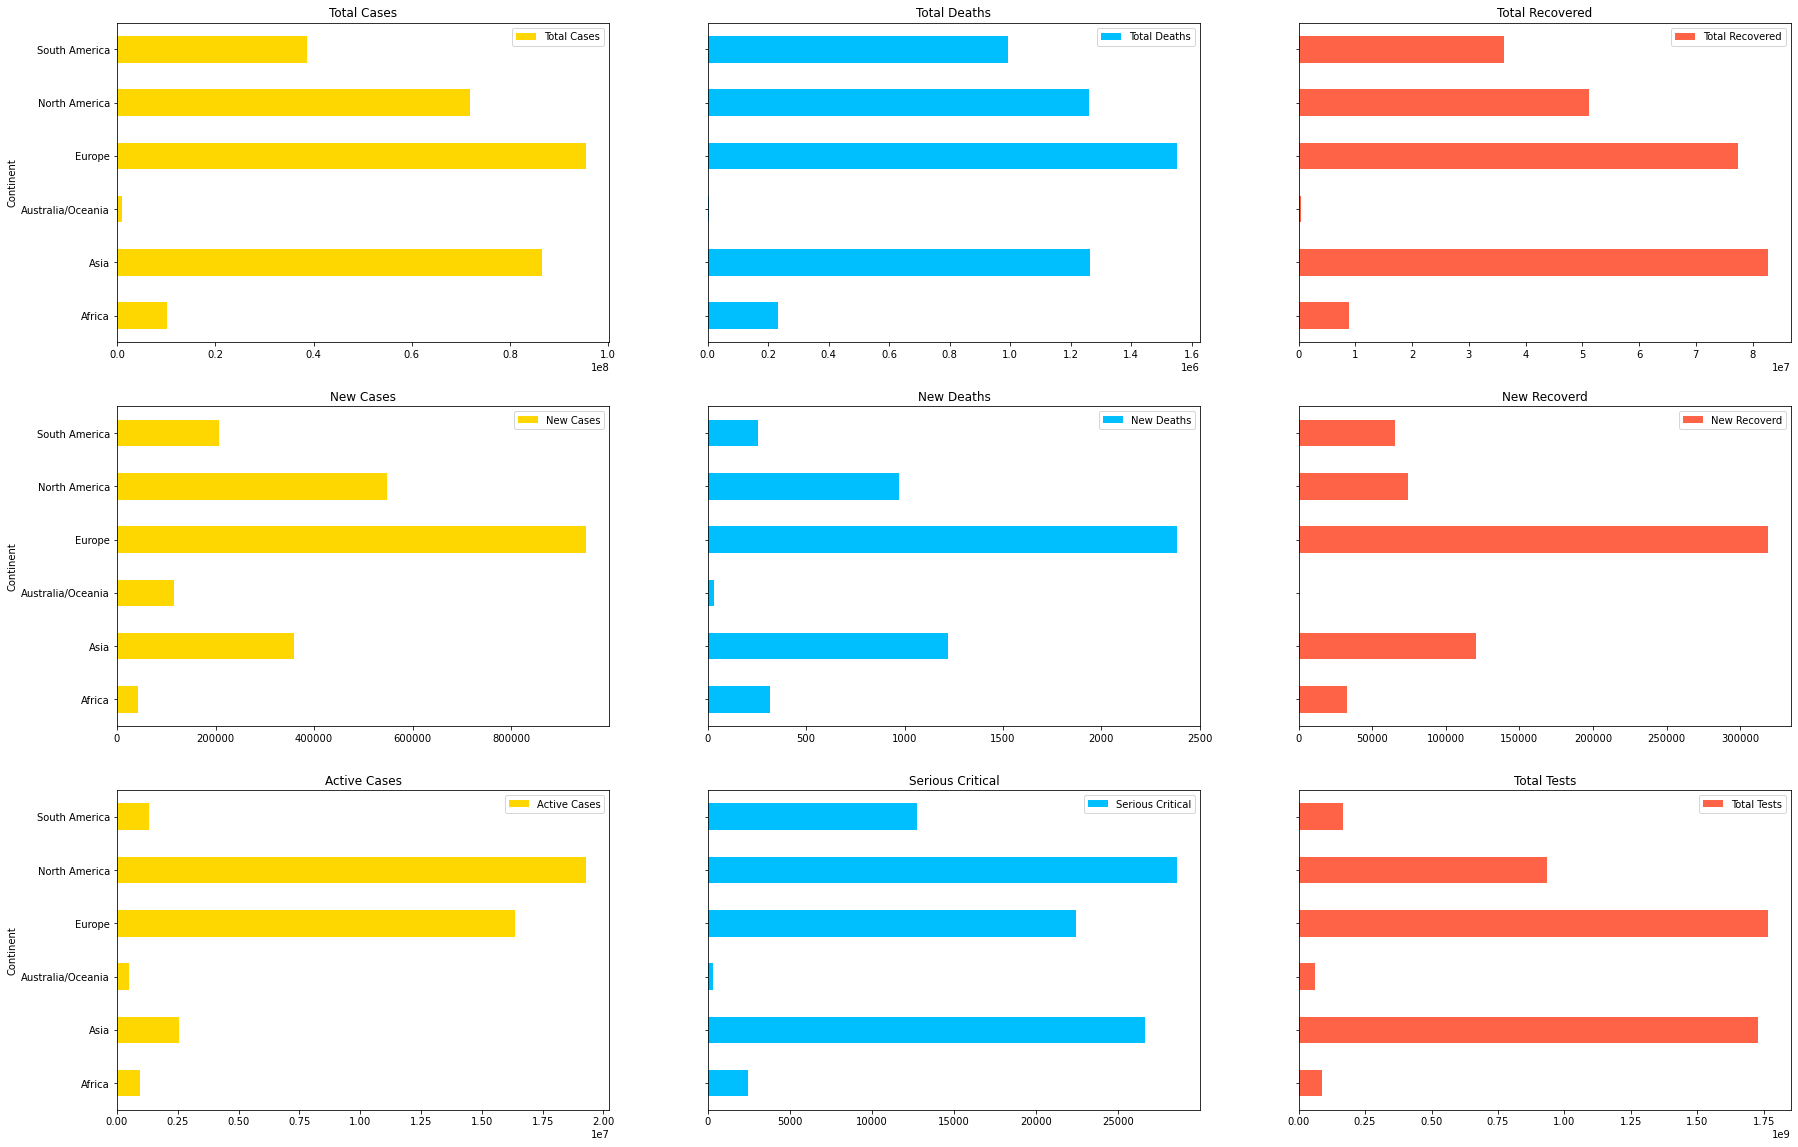

In [235]:
fig, ax = plt.subplots(3,3, sharey=True, figsize=(30, 20))
continent[["Total Cases"]].plot(kind='barh', color='gold', ax=ax[0,0], title='Total Cases');
continent[["Total Deaths"]].plot(kind='barh', color='deepskyblue', ax=ax[0,1], title='Total Deaths');
continent[["Total Recovered"]].plot(kind='barh', color='tomato', ax=ax[0,2], title='Total Recovered');
continent[["New Cases"]].plot(kind='barh', color='gold', ax=ax[1,0], title='New Cases');
continent[["New Deaths"]].plot(kind='barh', color='deepskyblue', ax=ax[1,1], title='New Deaths');
continent[["New Recoverd"]].plot(kind='barh', color='tomato', ax=ax[1,2], title='New Recoverd');
continent[["Active Cases"]].plot(kind='barh', color='gold', ax=ax[2,0], title='Active Cases');
continent[["Serious Critical"]].plot(kind='barh', color='deepskyblue', ax=ax[2,1], title='Serious Critical');
continent[["Total Tests"]].plot(kind='barh', color='tomato', ax=ax[2,2], title='Total Tests');

From those bar charts, Europe has a peak of total cases, total deaths, new cases, new Deaths, new recovered and total tests respectively. However, Asia has the highest point in total recovered. Additionally, the highest number of active cases and serious critical are in North America. While Australia/Oceania has the lowest point in total cases, total deaths, total recovered, new deaths, new recoverd, active cases, serious critical and total tests, the lowest new cases are in Africa. It can be argued that Australia/Oceania has the lowest population(from. the data frame in Population columns) so, they took the low COVID-19 test and the low number of people, it found the low cases in this continent. On the other hand, the highest population is in Asia. Due to this, it found out the high cases in this continent.

**4.1.1 How the big continent affect Covid-19 cases?**

* Plot the case compared to the continent

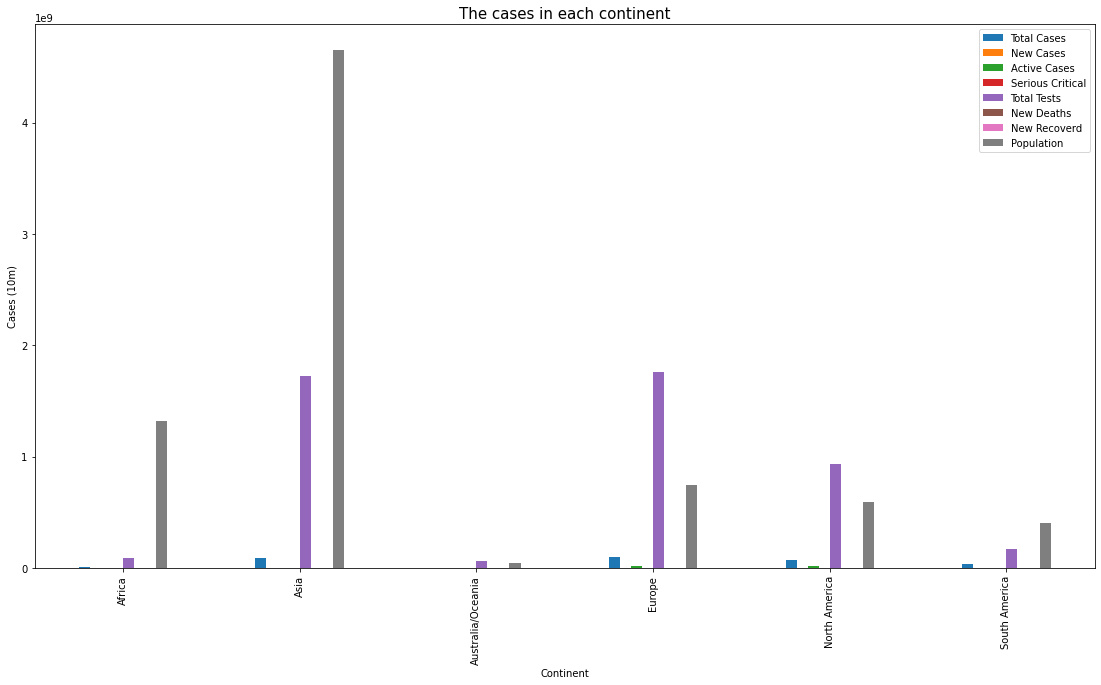

In [325]:
continent[["Total Cases","New Cases","Active Cases","Serious Critical","Total Tests","New Deaths","New Recoverd","Population"]].plot(kind="bar",figsize=(19,10));
plt.title("The cases in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Cases (10m)");

This figure is not good to see the different data. I will plot the separate case with following

* Plot the Total Cases/Total Recovered/Total Deaths with Continent

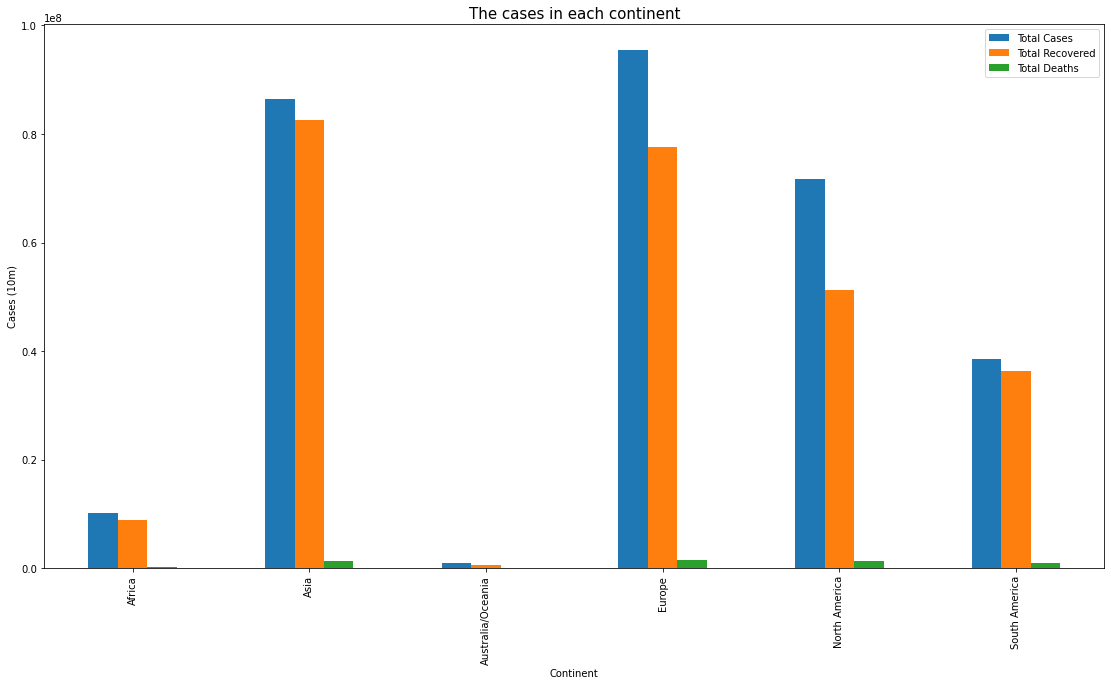

In [326]:
continent[["Total Cases","Total Recovered","Total Deaths"]].plot(kind="bar",figsize=(19,10));
plt.title("The cases in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Cases (10m)");

* Plot the % New Cases % New Deaths and % New Recoverd with Continent

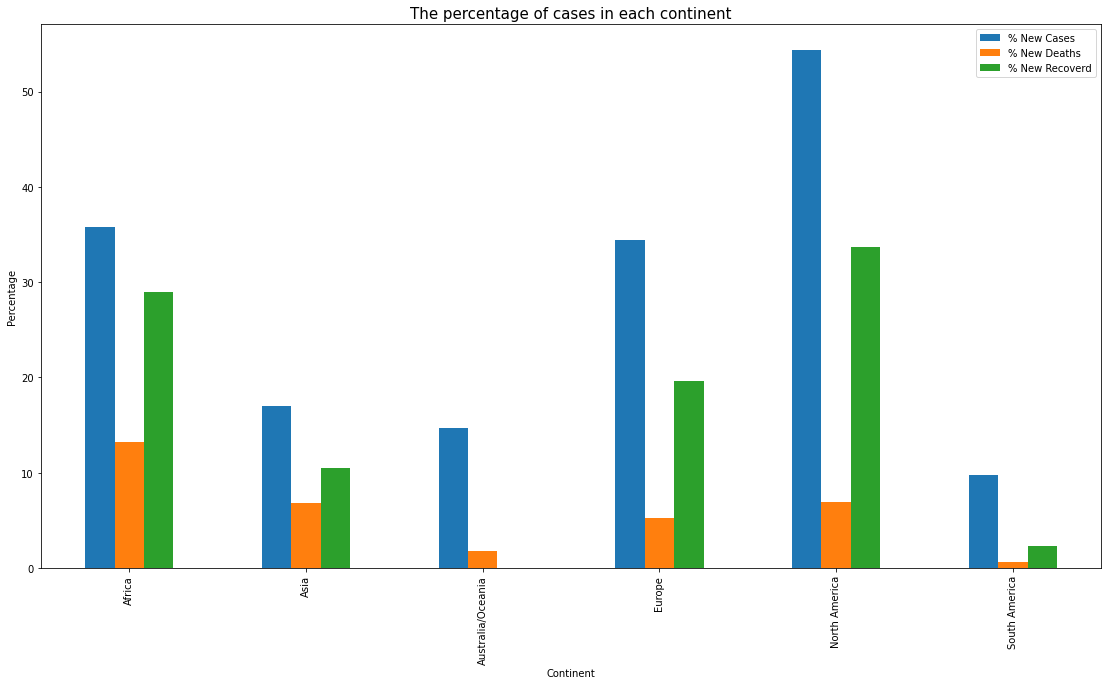

In [330]:
continent[["% New Cases", "% New Deaths","% New Recoverd"]].plot(kind="bar",figsize=(19,10));
plt.title("The percentage of cases in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Percentage");

From the data frame continent,  Asia has the highest population whereas in those figures Asia has a peak of Total Recovered. When compared to the percentage figure,  North America, which has the fourth-high population, has the peak in % New Cases and % New Recovered. It can be seen that Asia has a better manage COVID-19 more than a smaller continent. However, North America has the highest of %New Cases but they also have the highest % New Recovered. It can be argued that they have better health care to take care of people.

**4.1.2 How the small continent affect Covid-19 cases?**

* Plot the % Active Cases and % Serious Critical Deaths with Continent

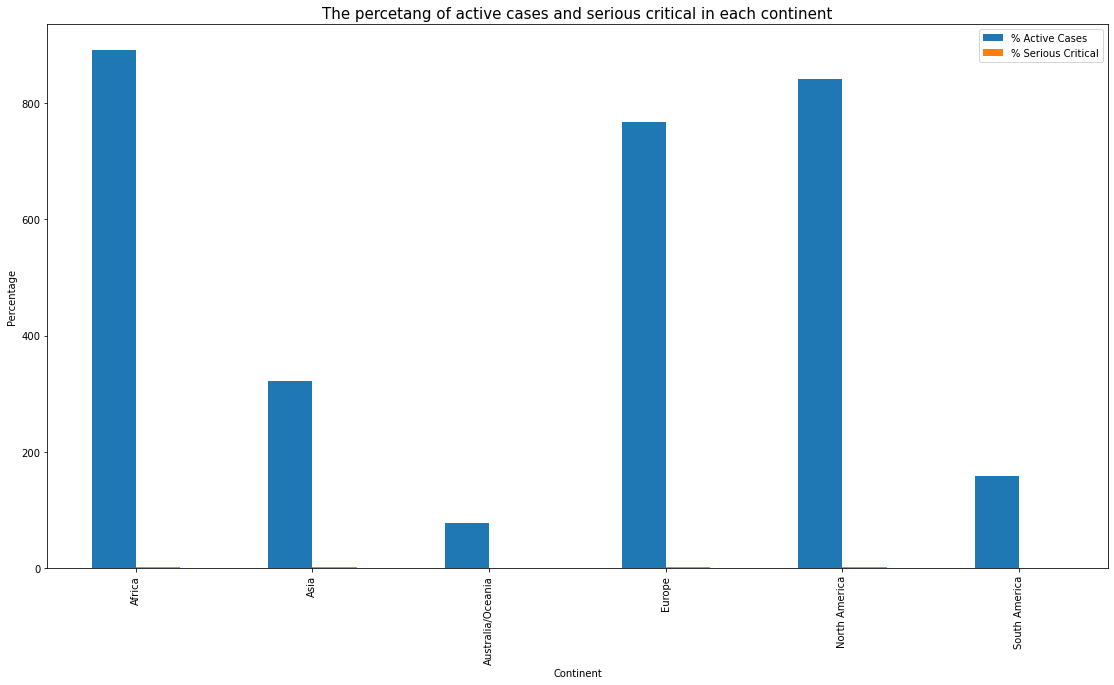

In [337]:
continent[["% Active Cases", "% Serious Critical"]].plot(kind="bar",figsize=(19,10));
plt.title("The percetang of active cases and serious critical in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Percentage");

From the above figure, It can not see the differnt between data, I will plot the separate case with following

* Plot the % Active Cases compare with Continent 

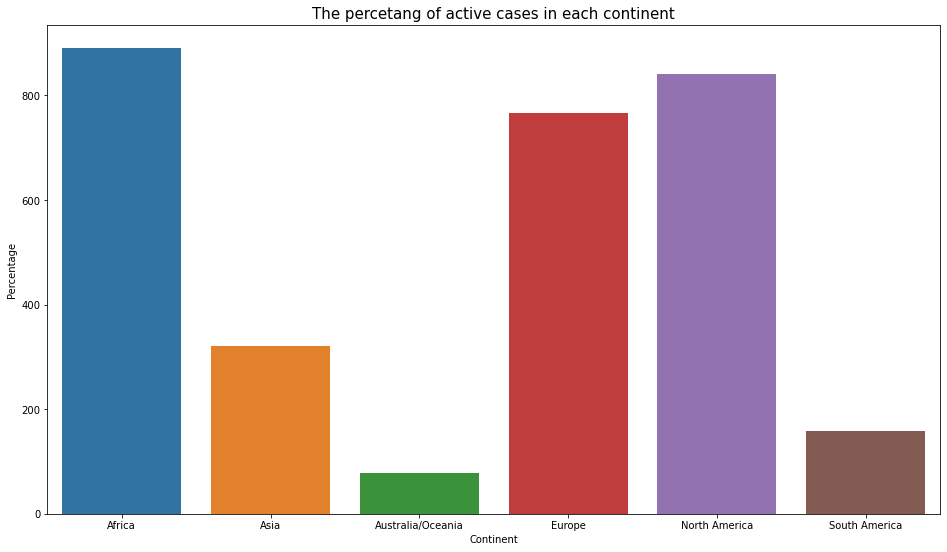

In [341]:
serious_critical = df.groupby(['Continent']).sum().reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = total_tests, y = "% Active Cases", x = "Continent", linewidth=4);
plt.title("The percetang of active cases in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Percentage");
plt.show()

* Plot the % Serious Critical compare with Continent

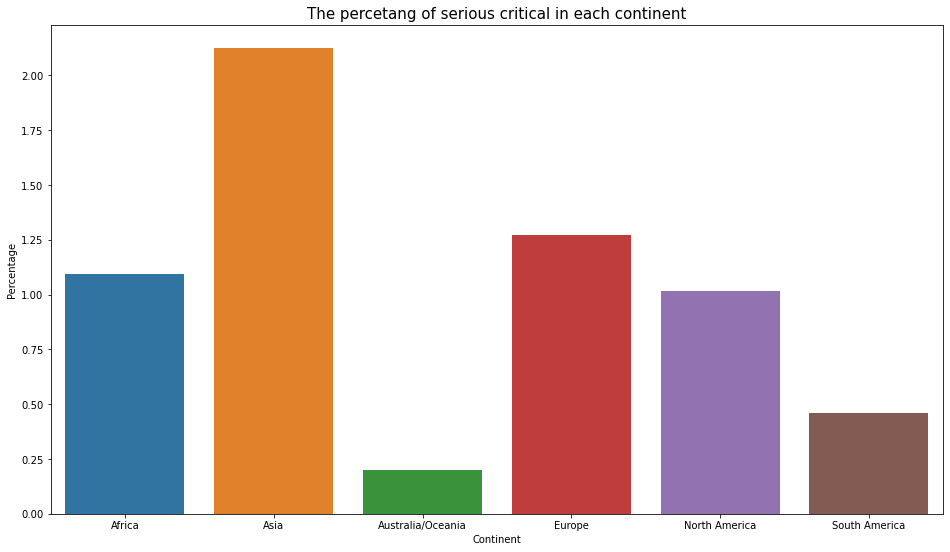

In [340]:
serious_critical = df.groupby(['Continent']).sum().reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = total_tests, y = "% Serious Critical", x = "Continent", linewidth=4);
plt.title("The percetang of serious critical in each continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Percentage");
plt.show()

* Plot the Total Tests and Continent

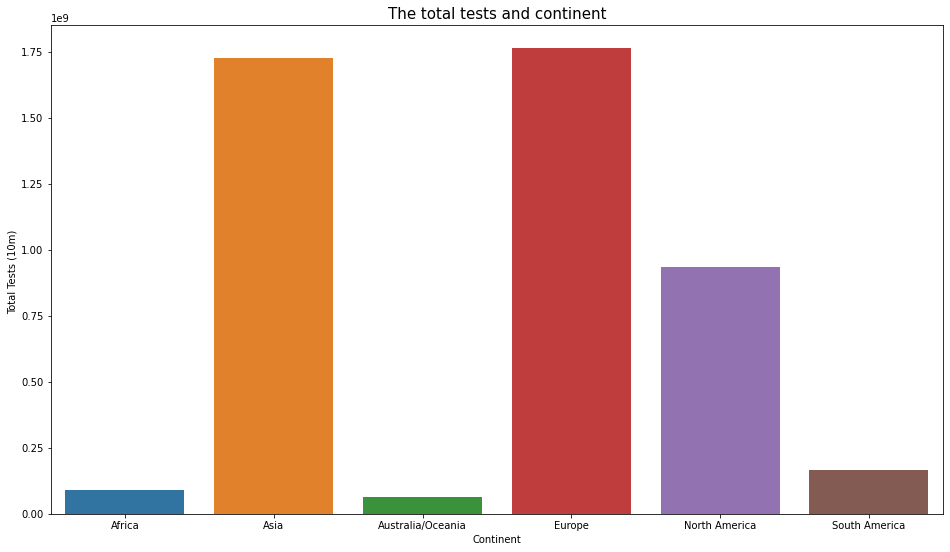

In [336]:
total_tests = df.groupby(['Continent']).sum().reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = total_tests, y = "Total Tests", x = "Continent", linewidth=4);
plt.title("The total tests and continent", size = 15)
plt.xlabel("Continent")
plt.ylabel("Total Tests (10m) ")
plt.show()

From those results, Australia/Oceania, which has the lowest population, has the lowest point in % Active Cases and % Serious Critical respectively and they also took the COVID-19 test in amount of lowest number. Consequently, the size of continents has the relationship with % Active Cases, % Serious Critical and Total Tests. In addition, South America which has the second-lowest number of people, also have the same result.

**4.2(Q2). What is the relationship between the population and Covid-19 case?**

* % Active Cases

Plot bar chart and explore correlation with population and % Active Cases

This figure will select the top ten population in countries.

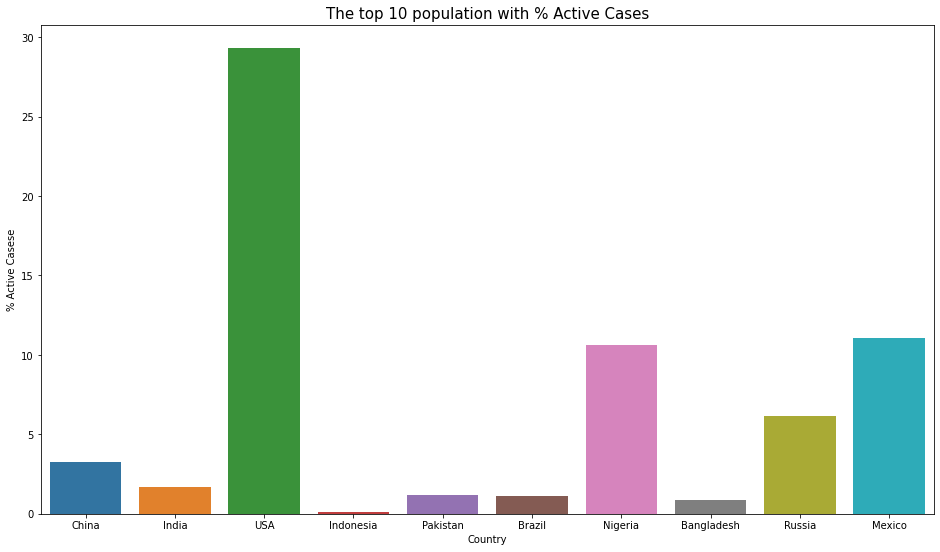

In [488]:
top_totalcase = df.sort_values(by='Population',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "% Active Cases", x = "Country", linewidth=4);
plt.title("The top 10 population with % Active Cases", size = 15)
plt.xlabel("Country")
plt.ylabel("% Active Casese")
plt.show()

Calculate correlation with two columns

In [493]:
data_set1 = df['Population']
data_set2 = df['% Active Cases']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.099


The figure shows the USA have the peak of % Active Cases whereas China, which has the highest population, has the low number in  % Active Cases. When calculating the correlation is nearly 0. It means that % Active Cases and Population are independent.

* % Serious Critical

Plot bar chart and explore correlation with population and % Serious Critical

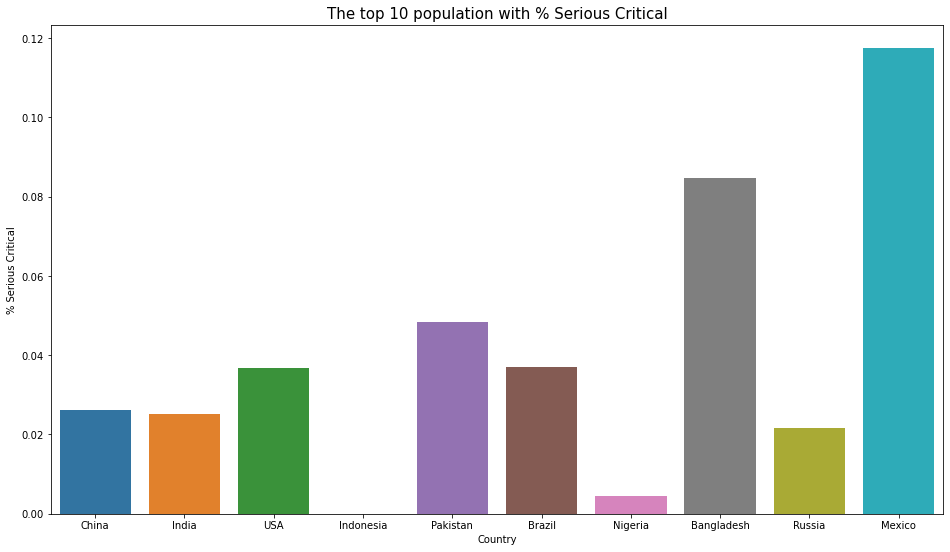

In [489]:
top_totalcase = df.sort_values(by='Population',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "% Serious Critical", x = "Country", linewidth=4);
plt.title("The top 10 population with % Serious Critical", size = 15)
plt.xlabel("Country")
plt.ylabel("% Serious Critical")
plt.show()

Calculate correlation with two columns

In [492]:
data_set1 = df['Population']
data_set2 = df['% Serious Critical']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.026


The chart shows Maxico have the peak of % Serious Critical whereas China, which has the highest population, has the low number in  % Serious Critical. When calculating the correlation is around 0. It means that % Serious Critical and Population are independent.

* % New Cases

Plot bar chart and explore correlation with population and % New Cases

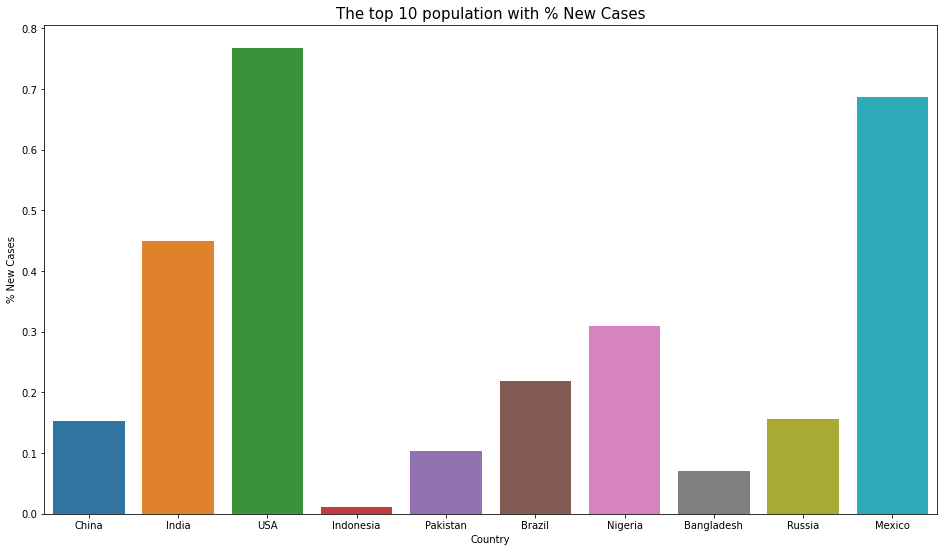

In [490]:
top_totalcase = df.sort_values(by='Population',ascending=False).reset_index()
fig = plt.figure(figsize = (16,9))
ax = sns.barplot(data = top_totalcase.iloc[:10], y = "% New Cases", x = "Country", linewidth=4);
plt.title("The top 10 population with % New Cases", size = 15)
plt.xlabel("Country")
plt.ylabel("% New Cases")
plt.show()

Calculate correlation with two columns

In [491]:
data_set1 = df['Population']
data_set2 = df['% New Cases']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.061


The chart shows the USA have the highest of % New Cases whereas China, which has the highest population, has the low number in  % New Cases. When calculating the correlation is around 0. It means that % New Cases and Population are independent.

**4.3 (Q3) Did the average of total cases which have more than 1000000 cases of all countries different than 6,548,941.12195122 (mean the total cases)?**

* find the total cases more than 1000000

In [359]:
df[df['Total Cases']>1000000]

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recoverd,Active Cases,Serious Critical,Total Tests,Population,Continent,% New Cases,% New Deaths,% New Recoverd,% Active Cases,% Serious Critical,% Total Tests
2,USA,60954028,468081.0,859046.0,669.0,42221173,48922.0,17873809,22445.0,833613178.0,3.339507e+08,North America,0.767925,0.077877,0.115871,29.323426,0.036823,249.621657
3,India,35528004,159632.0,483790.0,327.0,34453603,40863.0,590611,8944.0,688470959.0,1.400606e+09,Asia,0.449313,0.067591,0.118603,1.662382,0.025175,49.155221
4,Brazil,22499525,49303.0,619981.0,103.0,21626836,0.0,252708,8318.0,63776166.0,2.148541e+08,South America,0.219129,0.016613,0.000000,1.123170,0.036970,29.683472
5,UK,14333720,146365.0,150057.0,313.0,10722342,53694.0,3461321,868.0,418708539.0,6.842765e+07,Europe,1.021124,0.208587,0.500767,24.148100,0.006056,611.899633
6,France,11815121,303669.0,125348.0,142.0,8500643,48280.0,3189130,3333.0,188795159.0,6.549292e+07,Europe,2.570173,0.113285,0.567957,26.991937,0.028210,288.268035
7,Russia,10634603,16568.0,315400.0,796.0,9666161,20449.0,653042,2300.0,242900000.0,1.460295e+08,Europe,0.155793,0.252378,0.211552,6.140728,0.021628,166.336223
8,Turkey,9916725,66237.0,83529.0,141.0,9281458,34592.0,551738,1128.0,121838977.0,8.571700e+07,Asia,0.667932,0.168804,0.372700,5.563712,0.011375,142.140977
9,Germany,7500818,42422.0,114652.0,161.0,6692700,27900.0,693466,4636.0,89622218.0,8.419089e+07,Europe,0.565565,0.140425,0.416872,9.245205,0.061807,106.451204
10,Italy,7281280,197535.0,138881.0,184.0,5323523,52529.0,1818876,1557.0,147165930.0,6.032675e+07,Europe,2.712916,0.132488,0.986734,24.980168,0.021384,243.948046
11,Spain,7164906,0.0,89934.0,0.0,5145880,0.0,1929092,2005.0,66213858.0,4.678229e+07,Europe,0.000000,0.000000,0.000000,26.924177,0.027984,141.536163


* Convert the sample data frame to list

In [393]:
sample_totalcase = list(df[df['Total Cases']>1000000]['Total Cases'].sample(40))
print(sample_totalcase)

[2524191, 4202091, 1490694, 1329130, 35528004, 5300032, 1749530, 1342646, 7500818, 7164906, 2096806, 10634603, 1613427, 6237525, 2261039, 1282957, 1876394, 1476524, 1489024, 2936740, 60954028, 1077432, 2514464, 1302486, 3310662, 2231686, 7281280, 1825417, 6204925, 1416650, 3699663, 22499525, 4083118, 1592209, 14333720, 9916725, 3521572, 2783331, 4265666, 11815121]


* Calculate the mean of total case and mean of sample

In [404]:
import statistics as st
mean_sample = st.mean(sample_totalcase) #calculate mean of sample
mean_totalcase = df[df['Total Cases']>1000000]['Total Cases'].mean()#calculate mean of total test
print("The mean of sample is: ", mean_sample)
print("The mean total case:",mean_totalcase)

The mean of sample is:  6666669.025
The mean total case: 6548941.12195122


* Perform Hypothesis test

n = 40  
μ0 = 6548941.12195122  
μ = 6666669.025  

H0 :  μ0 = 6548941.12195122  
H1 :  μ ≠ 6548941.12195122

In [407]:
from scipy import stats
import statsmodels.api as sm
z_val, p_val =stats.ttest_1samp(sample_totalcase, mean_totalcase)
print('The test statistic is: ', p_val)
print('The p value', z_val,)

The test statistic is:  0.9462343563099064
The p value 0.06787194408181364


The p value is more than 0.05. It accepts the null hypothesis. 
  
Claim: No, there is statistic evidence to claim that the average total case is not differnt than 6548941.12195122 cases.

**4.4(Q4). Does more testing reduce the Covid-19 case?**

Use the scatter plot to explore the relationship between two columns

* Total Tests and Total Recovered

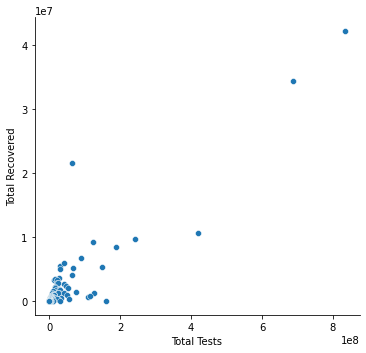

In [480]:
sns.relplot(x="Total Tests", y = "Total Recovered", data=df);

In [494]:
data_set1 = df['Total Tests']
data_set2 = df['Total Recovered']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.905


There is a strong correlation between Total Tests and Total Recovered.

* Total Tests and Total Deaths

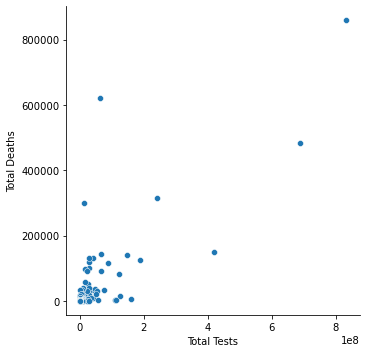

In [481]:
sns.relplot(x="Total Tests", y = "Total Deaths", data=df);

In [495]:
data_set1 = df['Total Tests']
data_set2 = df['Total Deaths']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.793


There is a weak correlation/relationship between Total Tests and Total Deaths

* Total Tests and Total Cases

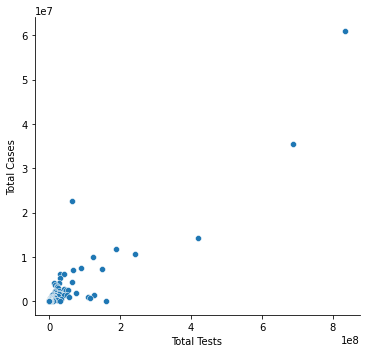

In [482]:
sns.relplot(x="Total Tests", y = "Total Cases", data=df);

In [496]:
data_set1 = df['Total Tests']
data_set2 = df['Total Cases']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.916


Total Tests and Total Cases have a strong correlation or relationship

* Total Tests and % New Deaths

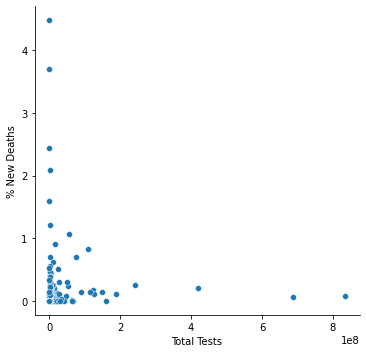

In [483]:
sns.relplot(x="Total Tests", y = "% New Deaths", data=df);

In [497]:
data_set1 = df['Total Tests']
data_set2 = df['% New Deaths']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.015


There is a weak correlation/relationship between Total Tests and % New Deaths

* Total Tests and % New Cases

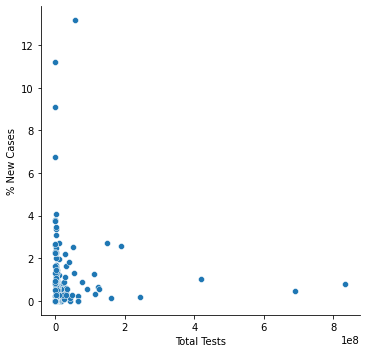

In [484]:
sns.relplot(x="Total Tests", y = "% New Cases", data=df);

In [498]:
data_set1 = df['Total Tests']
data_set2 = df['% New Cases']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.013


There is a weak correlation/relationship between Total Tests and % New Cases

* Total Tests and % Serious Critical

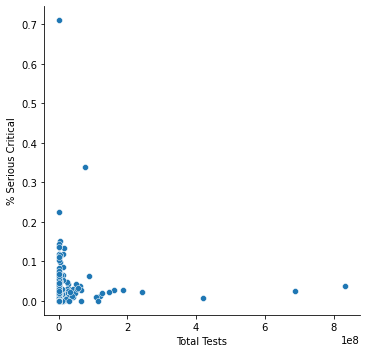

In [499]:
sns.relplot(x="Total Tests", y = "% Serious Critical", data=df);

In [500]:
data_set1 = df['Total Tests']
data_set2 = df['% Serious Critical']
corr, _ = pearsonr(data_set1, data_set2) 
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.006


Total Tests and % Serious Critical have a weak correlation or relationship

In conclusion, Total Tests have a relationship with Total Recovered, Total Cases. It means that when Total Tests go up, Total Recovered, Total Cases will increase. However,  it doesn't mean that Total Tests are causing the number of two variables. There are other factors to affect those variables.

#### 4.5(Q5): Can we predict the Total Recovered by Total Cases?
**Try to use the the Simple Linear Regression to predict Total Cases(x) and Total Recovered**

In [477]:
from sklearn.linear_model import LinearRegression

#split the data into training and testing
totaltest_x_training = df['Total Cases'][:100].reset_index()
totaltest_x_testing = df['Total Cases'][100:].reset_index()

#Split the data which want to predict
totaldeths_y_training = df['Total Recovered'][:100].reset_index()
totaldeths_y_testing = df['Total Recovered'][100:].reset_index()


In [478]:
#Built the model
linereg = LinearRegression()
linereg.fit(totaltest_x_training, totalcase_y_training)

#Perform predict
totaldeths_y_predict = linereg.predict(totaltest_x_testing)

print("Coefficients: ", linereg.coef_[0])
print("Intercept:", linereg.intercept_)

Coefficients:  [1.00000000e+00 2.17605532e-22]
Intercept: [-2.13162821e-14  2.66463789e+04]


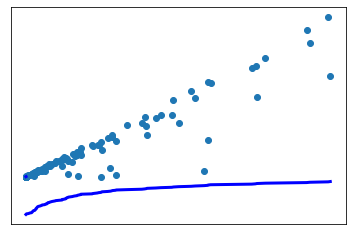

In [479]:
#show the output by ploting 
plt.scatter(totaltest_x_testing, totaldeths_y_testing)
plt.plot(totaltest_x_testing, totaldeths_y_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

From the result, the model from these two data is not good. In the figure, the data is like a cluster and the distribution is not look like a line graph. Thus, the prediction will follow the cluster distribution and the result of the prediction is not a linear graph. For this case, those two data is not suitable for using the linear regression model.

## Step 5:  Conclusion

In this task, the data can analyze the relationship between the population and the COVID-19 case. The effect of COVID-19 compares the continent in our world. Moreover, The distribution of COVID-19 cases spread around the country. It can analyze which countries are top-rank of COVID-19 cases. Additionally, the total tests have any effect on the COVID-19 cases such as active cases, new deaths and total deaths. 

On the other hand, this data set is still good quality because there are a lot of missing values. It can not replace with mean or median owing to the fact that the total case adds up from other columns. In addition, there are only qualitative data so, it can analyze base on the continent and country only.

On the one hand,  this project can apply with the other COVID-19 data sets which have the number of cases in each day and time. Moreover, it can apply to the COVID-19 cases and the number of the vaccine in every country so, it can analyze how vaccines reduce the COVID-19 cases. 

This project can apply with other COVID-19 data sets with the following
* COVID-19 data set from NHS: https://developer.api.nhs.uk/coronavirus/api
* COVID-19 European Centre for Disease Prevention and Control: https://www.ecdc.europa.eu/en/covid-19/data
* COVID-19 Open Research Dataset Challenge (CORD-19) from keggle: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge
